In [170]:
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [171]:
data = pd.read_csv('Concrete_Data_Yeh.csv')

## Exploratory data Analysis

In [271]:
data.corr()

cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.246439 -0.397467 -0.081587         -0.005310   
slag             -0.246439  1.000000 -0.273846  0.070339          0.088960   
flyash           -0.397467 -0.273846  1.000000 -0.256984          0.524172   
water            -0.081587  0.070339 -0.256984  1.000000         -0.632292   
superplasticizer -0.005310  0.088960  0.524172 -0.632292          1.000000   
coarseaggregate  -0.109349 -0.332380 -0.009961 -0.182294         -0.245879   
fineaggregate    -0.222718 -0.264426  0.079108 -0.450661          0.204239   
age               0.025590 -0.020930 -0.055096  0.199847         -0.095684   
csMPa             0.497832  0.180805 -0.105755 -0.289633          0.348298   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.025590  0.497832  
slag                    -0.332380      -0.264426 -0.020930  0.180805  
flyash                  -0.009961       0.079108 -0.055096 -0.105755  
water                   -0.182294      -0.450661  0.199847 -0.289633  
superplasticizer        -0.245879       0.204239 -0.095684  0.348298  
coarseaggregate          1.000000      -0.178481 -0.027916 -0.164935  
fineaggregate           -0.178481       1.000000 -0.125593 -0.167241  
age                     -0.027916      -0.125593  1.000000  0.519950  
csMPa                   -0.164935      -0.167241  0.519950  1.000000

In [272]:
data.describe()

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864     6.045409    54.188350   181.567282          1.932660   
std     104.506364     6.114340    63.997004    21.354219          1.572223   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000     4.690416     0.000000   185.000000          2.529822   
75%     350.000000    11.956169   118.300000   192.000000          3.193744   
max     540.000000    18.957848   200.100000   247.000000          5.674504   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485     2.304569    35.817961  
std          77.753954      80.175980     0.681358    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     1.626577    23.710000  
50%         968.000000     779.500000     2.300327    34.445000  
75%        1029.400000     824.000000     2.735565    46.135000  
max        1145.000000     992.600000     4.370924    82.600000

## Checking the Percentage of Missing Values

In [282]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
percent      ### checking the percent of the data is misssing 

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

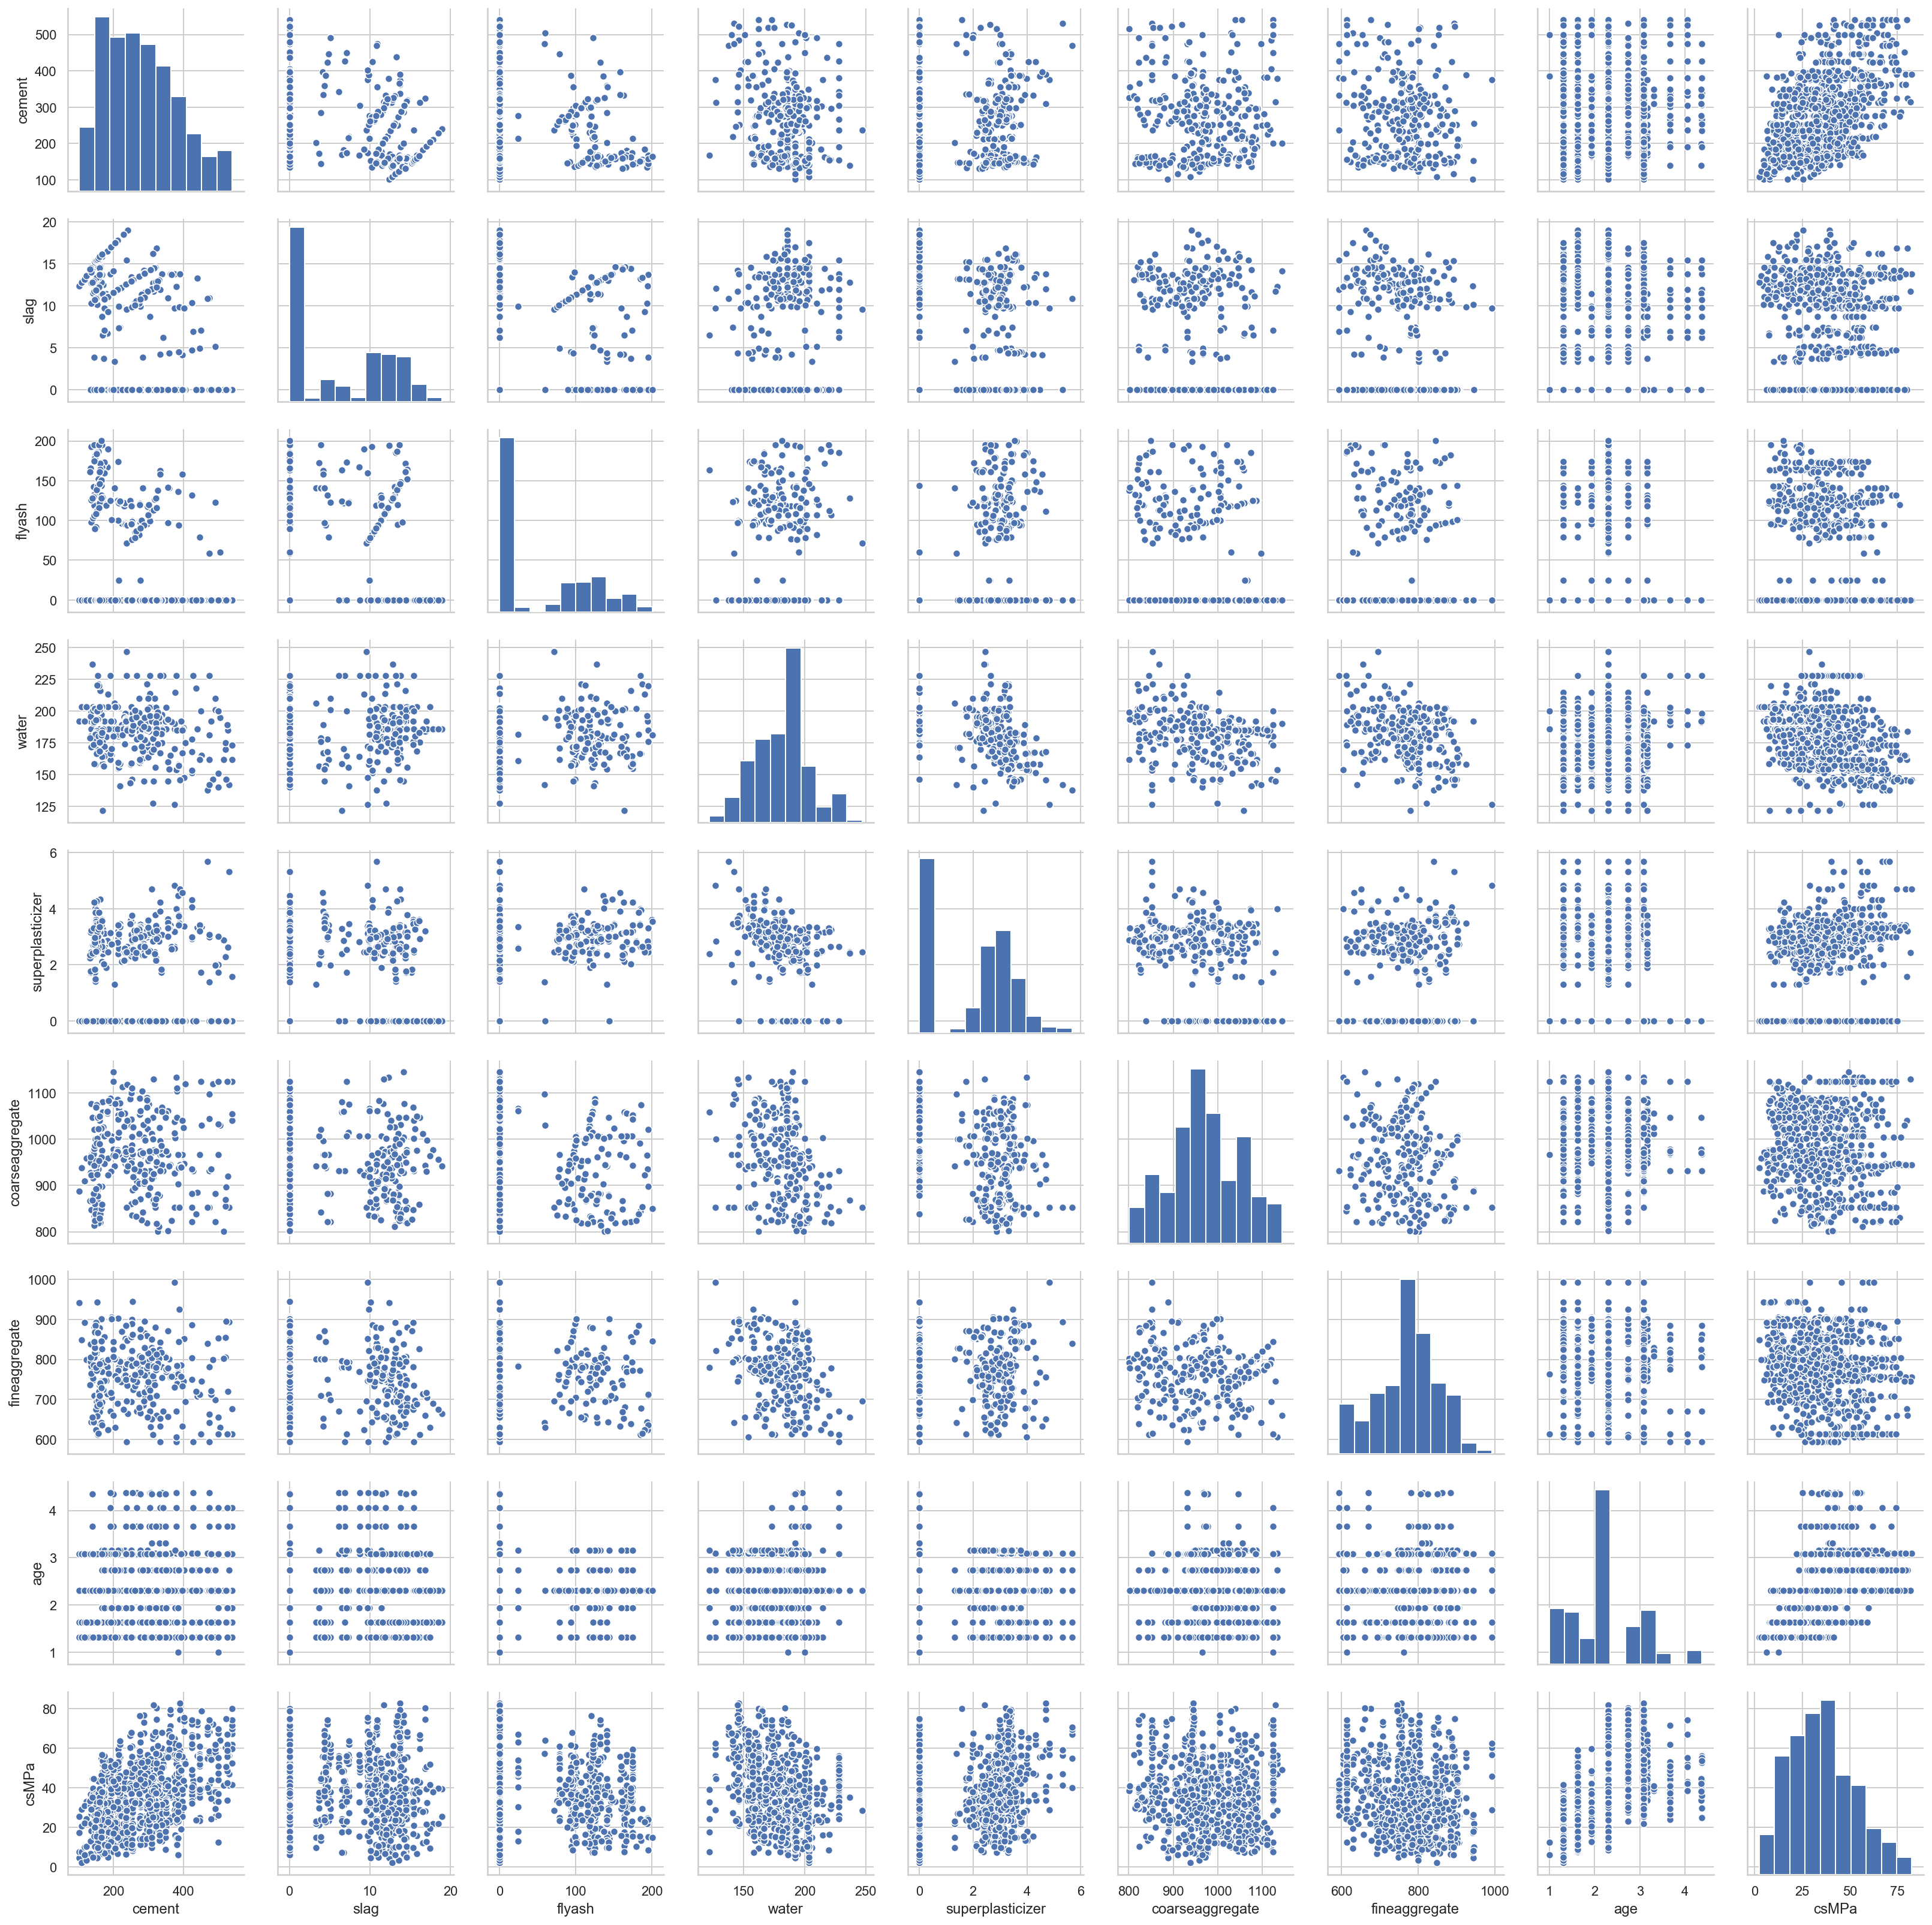

In [274]:
#sns.pairplot(data)

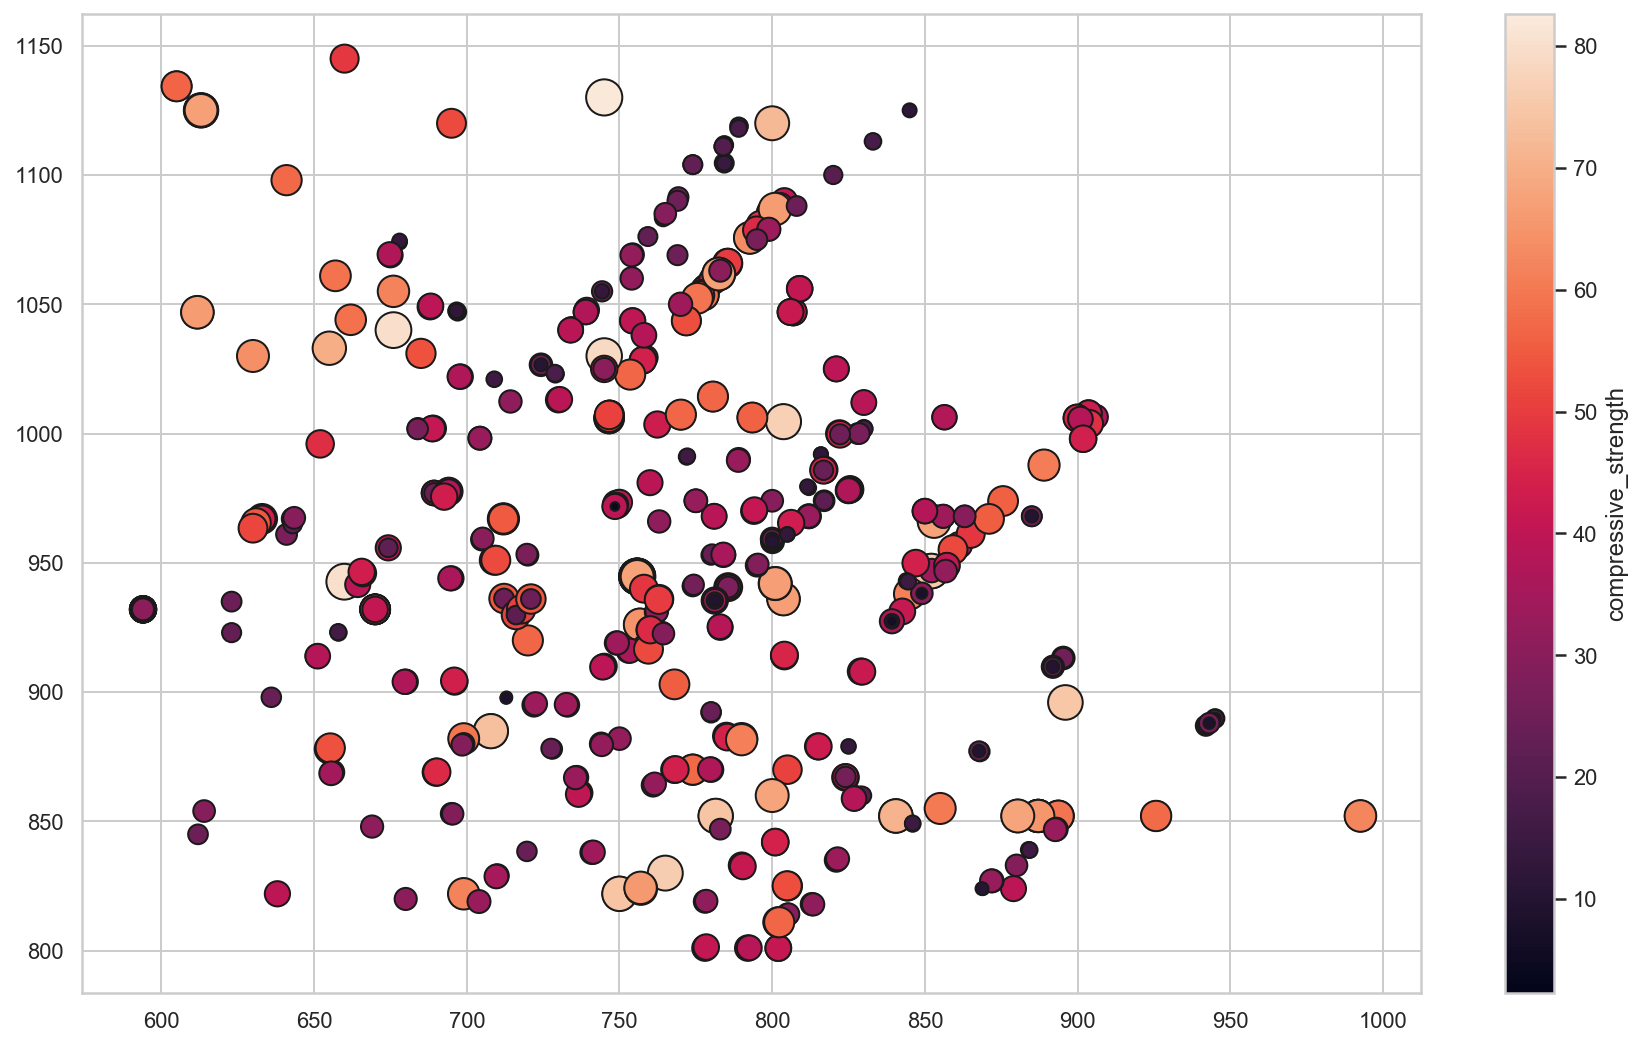

In [281]:
plt.scatter(data["fineaggregate"],data["coarseaggregate"], c=data["csMPa"],s=data["csMPa"]*4,
            linewidth=1,edgecolor="k")

lab = plt.colorbar()
lab.set_label("compressive_strength")

### Performing statistical test on raw data

In [172]:
X = data.drop('csMPa', axis=1)
y = data['csMPa']

In [173]:
X_constant=sm.add_constant(X)
model =sm.OLS(y,X_constant).fit()
predictions =model.predict(X_constant)
model.summary()

C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 01 Jan 2020   Prob (F-statistic):          6.29e-206
Time:                        17:21:47   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Building a BASE model - Linear Regression

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [175]:
lr = LinearRegression()

In [176]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
y_train_pred = lr.predict(X_train)

In [178]:
y_test_pred = lr.predict(X_test)

In [179]:
print('Train Accuracy :' ,(r2_score(y_train, y_train_pred)*100))

Train Accuracy : 62.41401500534327


In [180]:
print('Test Accuracy: ', (r2_score(y_test, y_test_pred)*100))

Test Accuracy:  58.09009949396218


In [181]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 115.02685661951008
Mean Absolute Error: 8.22961273552593
Root Mean Squared Error: 10.72505741800528


## Base Model 

Train Accuracy : 62.41401500534327


Test Accuracy:  58.09009949396218

-------------------------------------------------------------------------------------------

### Performing Further EDA of visualizing my Numerical Columns and the values 

#### Performing Operations to improve Accuracy 

In [182]:
data.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

In [183]:
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [184]:
data.shape

(1030, 9)

### Checking Numerical and Categorical Columns

In [185]:
data.describe()

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     7.000000    23.710000  
50%         968.000000     779.500000    28.000000    34.445000  
75%        1029.400000     824.000000    56.000000    46.135000  
max        1145.000000     992.600000   365.000000    82.600000

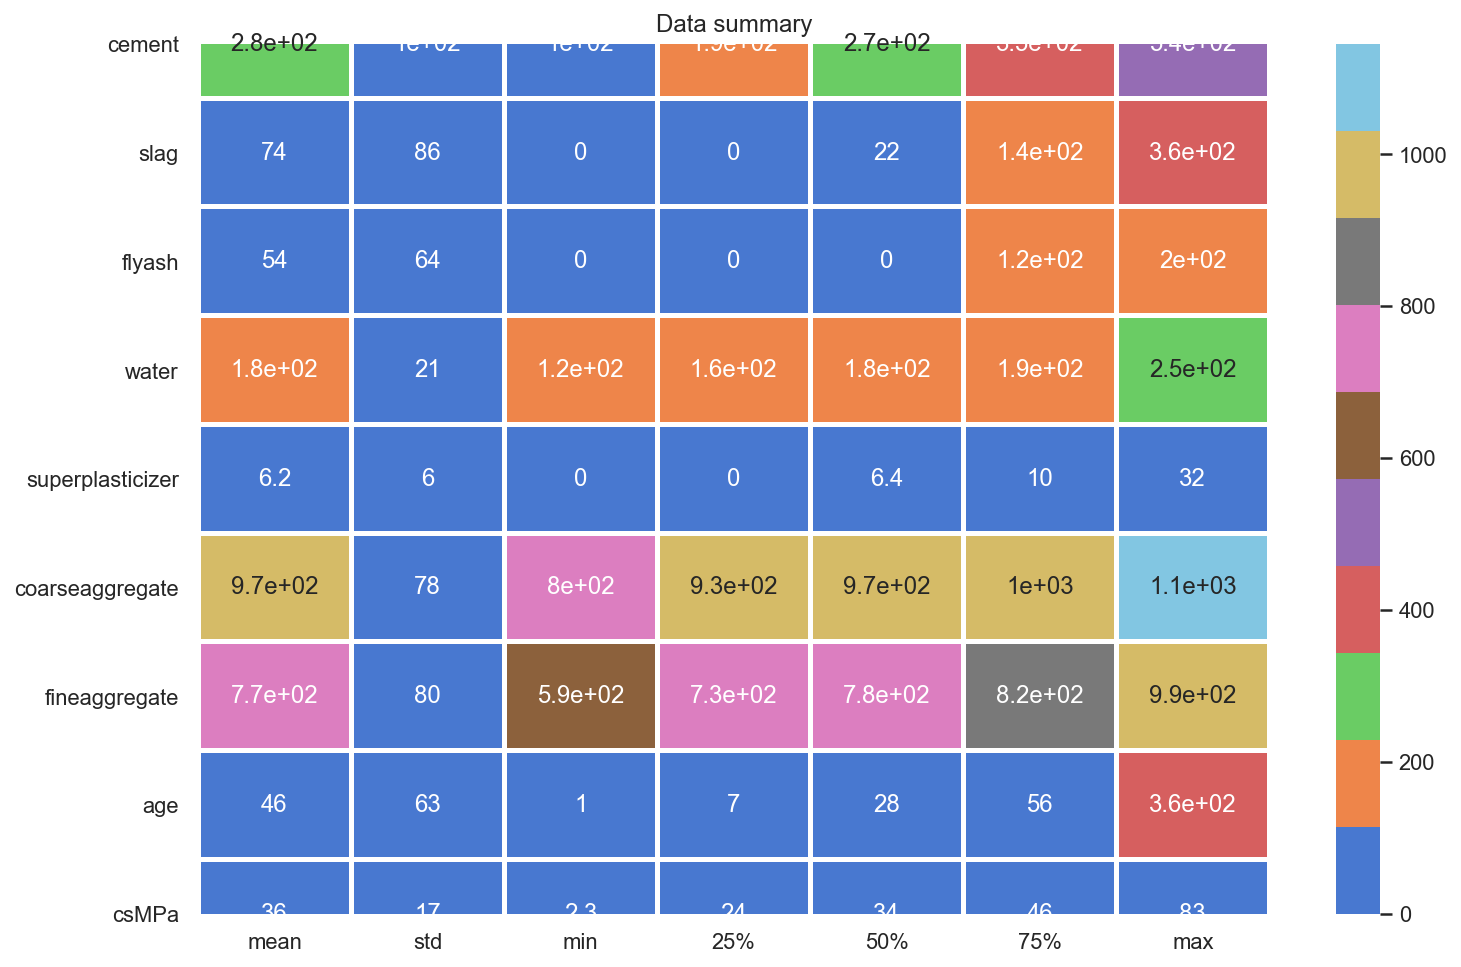

In [186]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("muted"))
plt.title("Data summary")
plt.show()

In [187]:
data_num = data

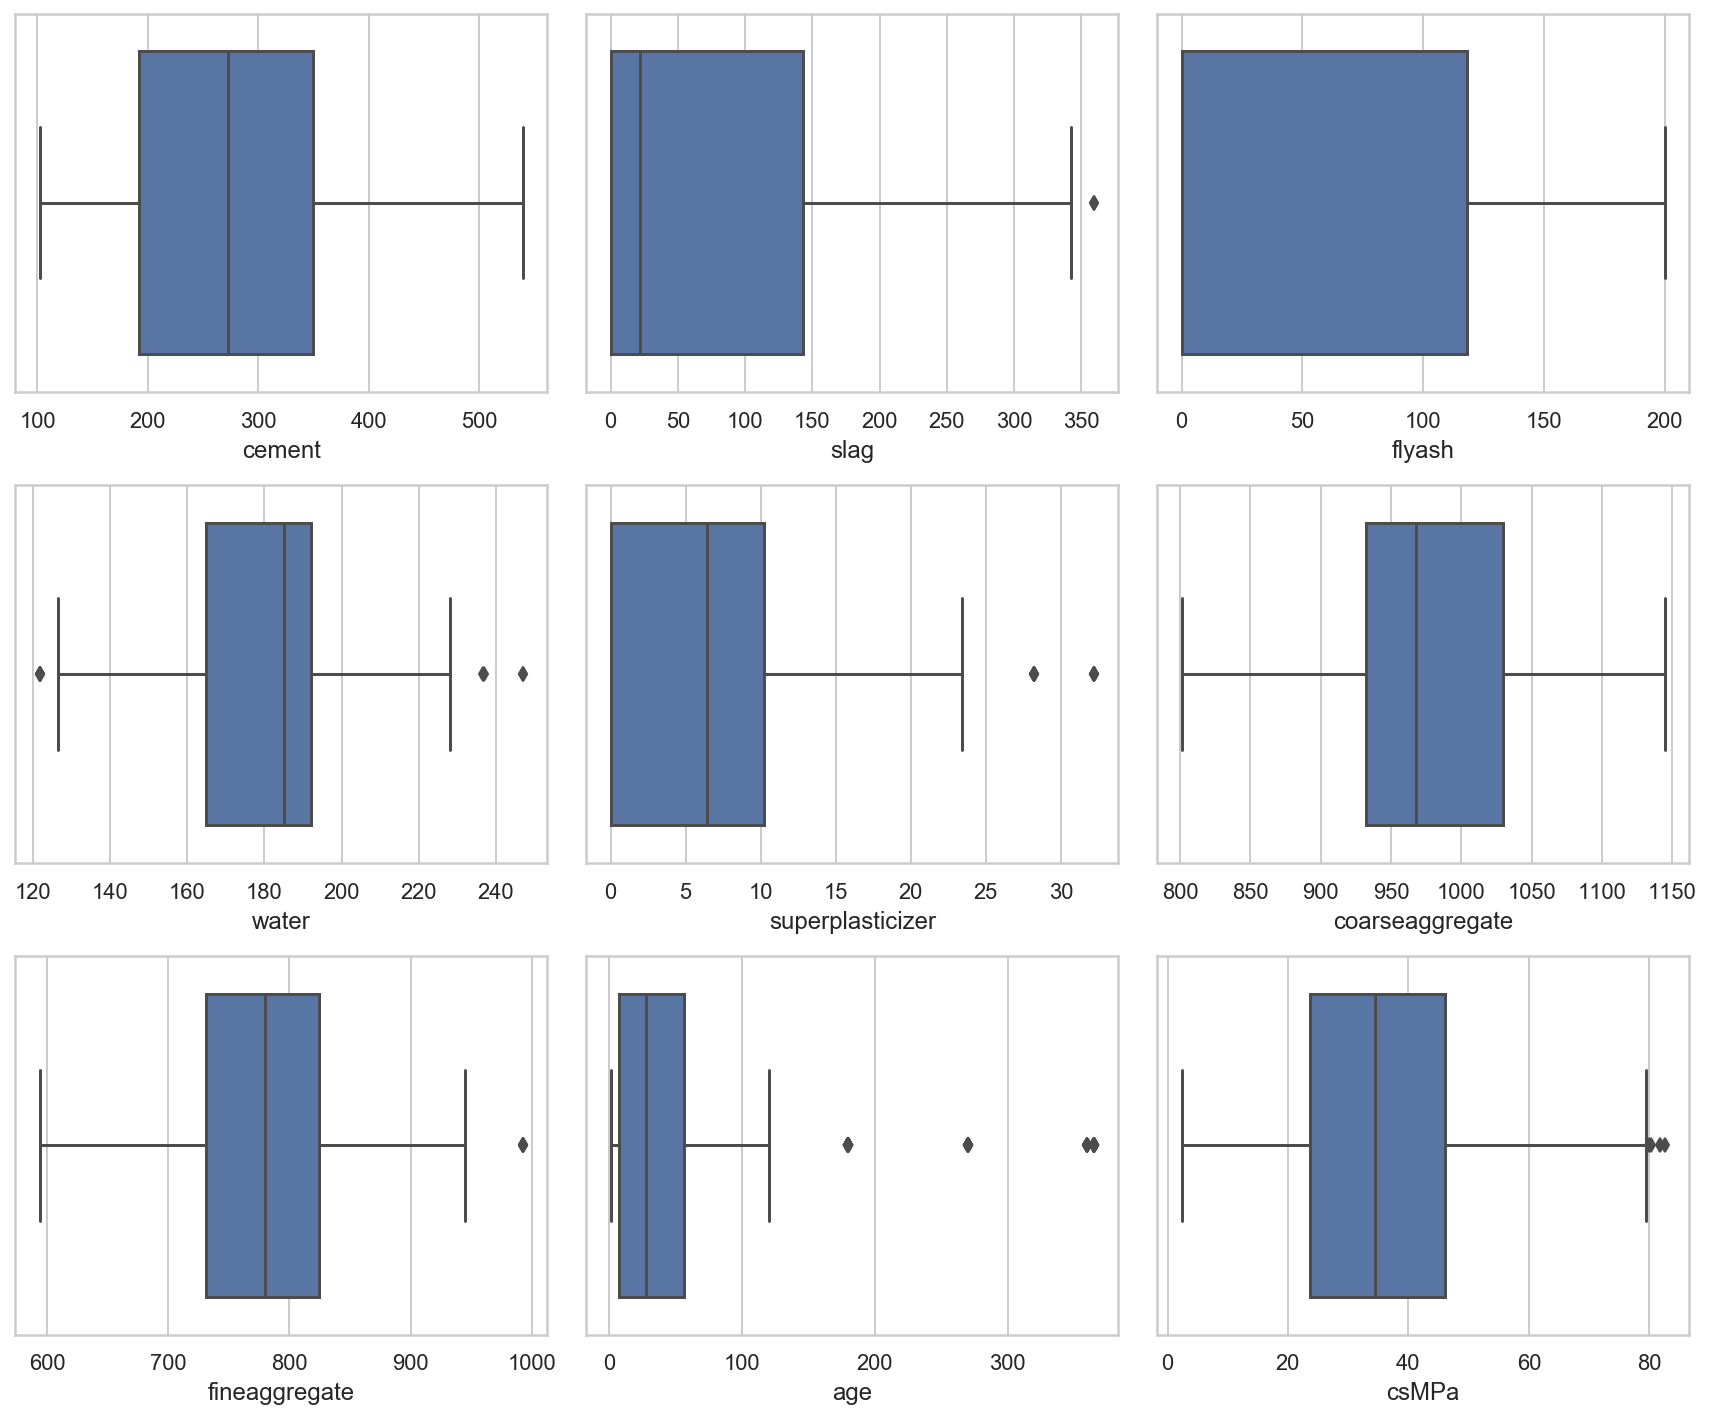

In [188]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

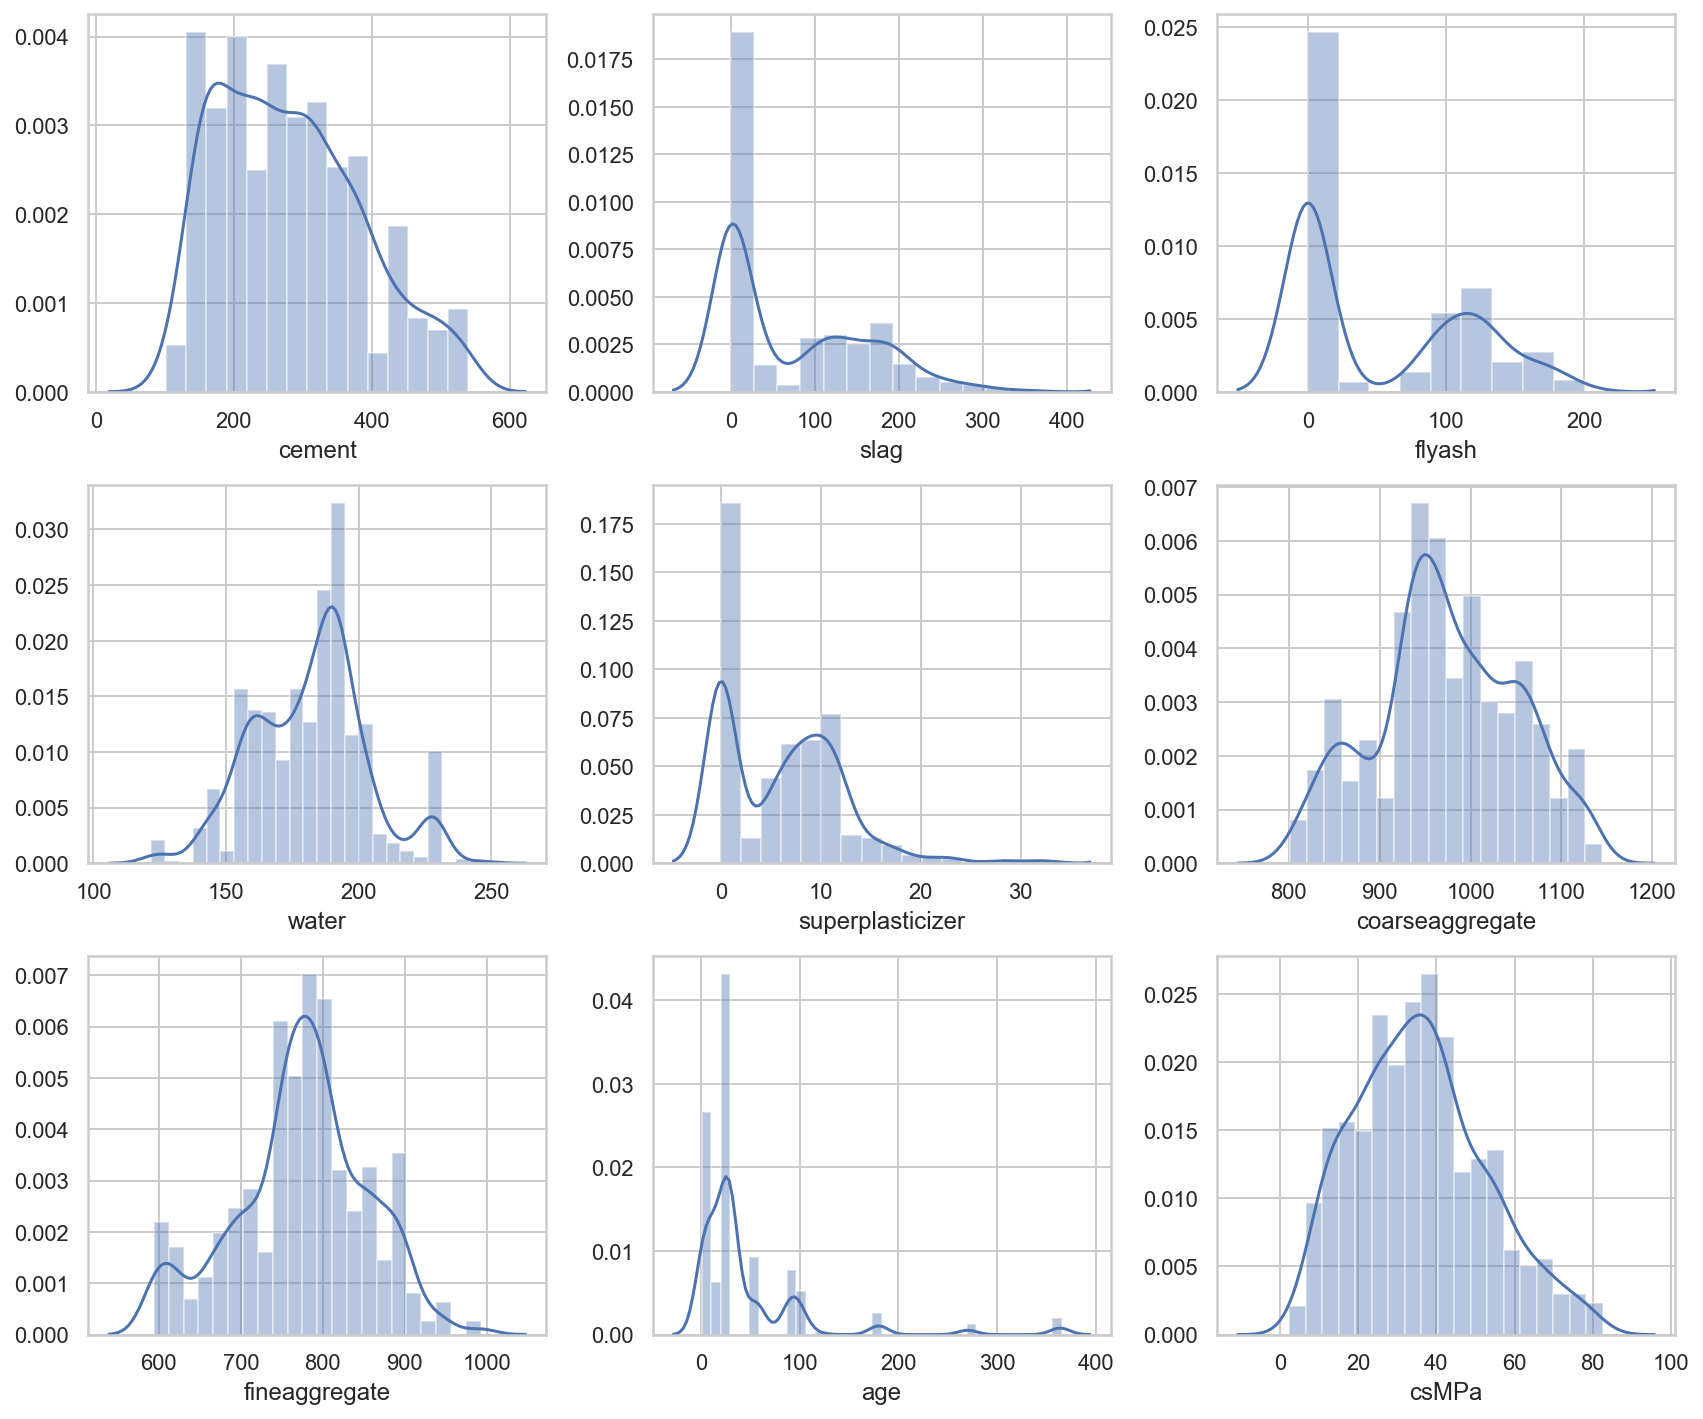

In [189]:
num_cols = data_num.columns
fig, ax = plt.subplots(3,3,figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(data[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

Since, there are no categorical Features , lets work on Numerical Features

*-Checking and Transforming the Variables-*

*$ AGE$*

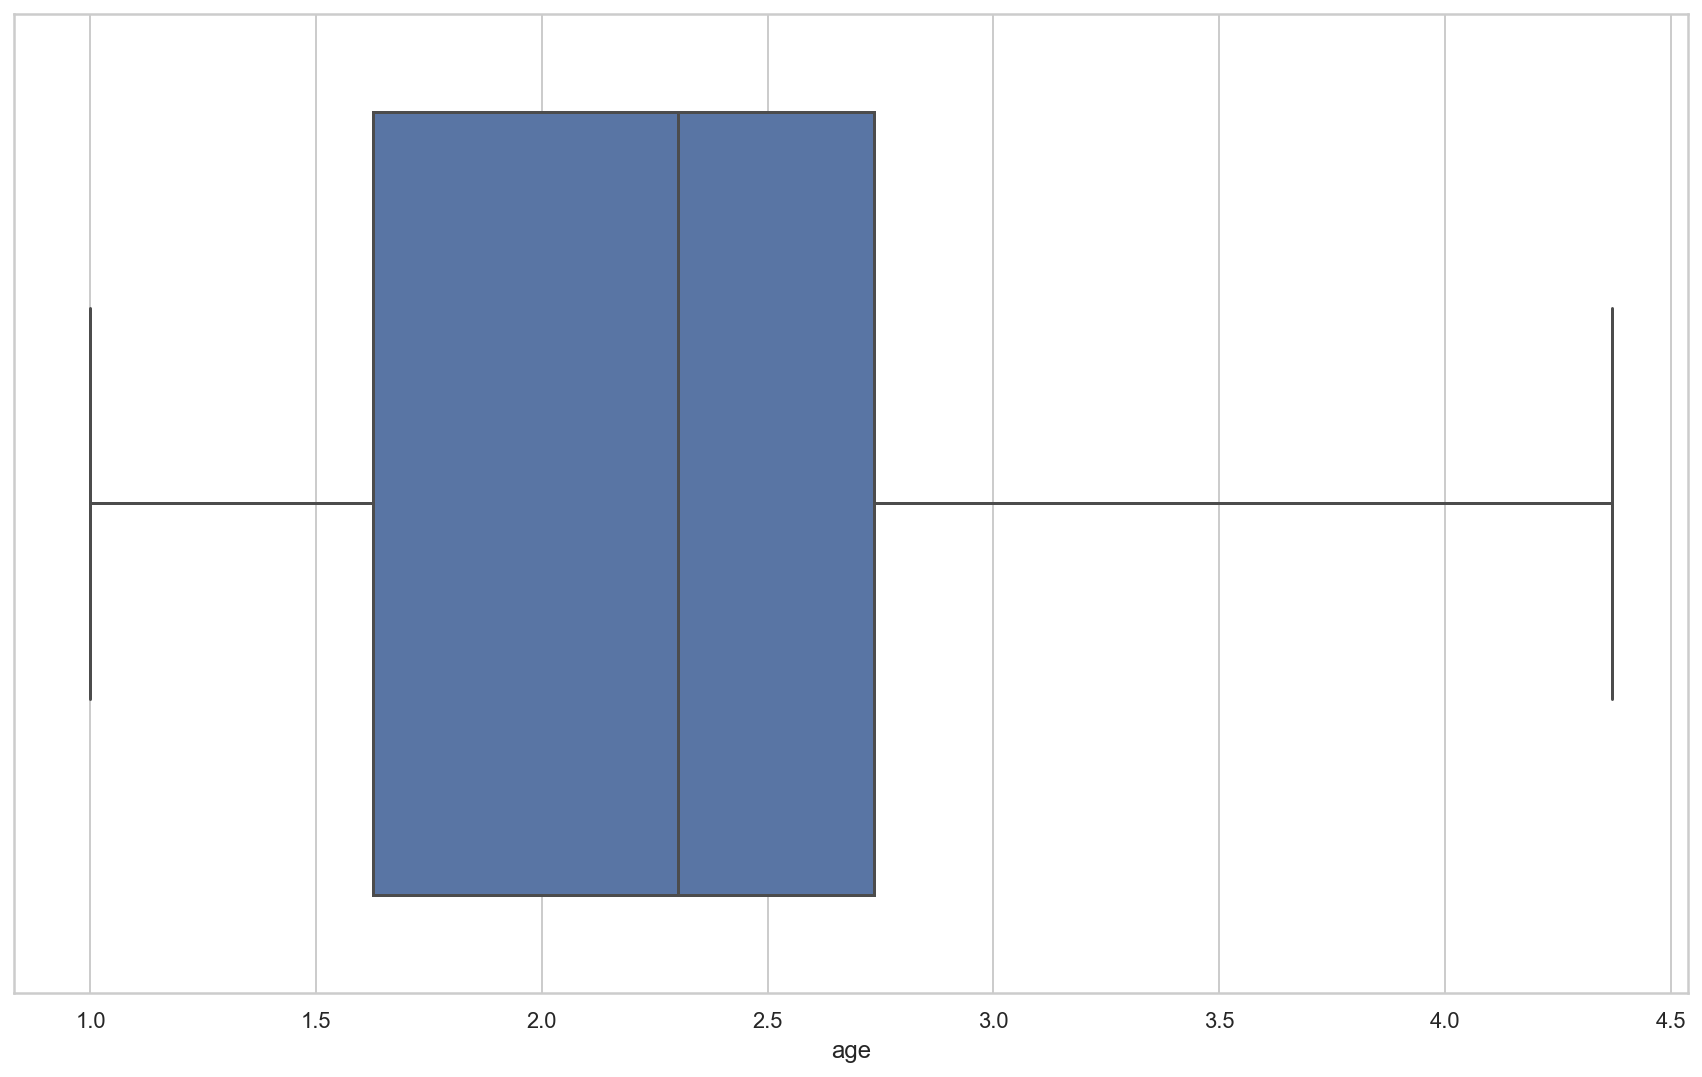

In [190]:
sns.boxplot(np.sqrt(np.sqrt(data['age'])))

In [191]:
data['age']=np.sqrt(np.sqrt(data['age']))

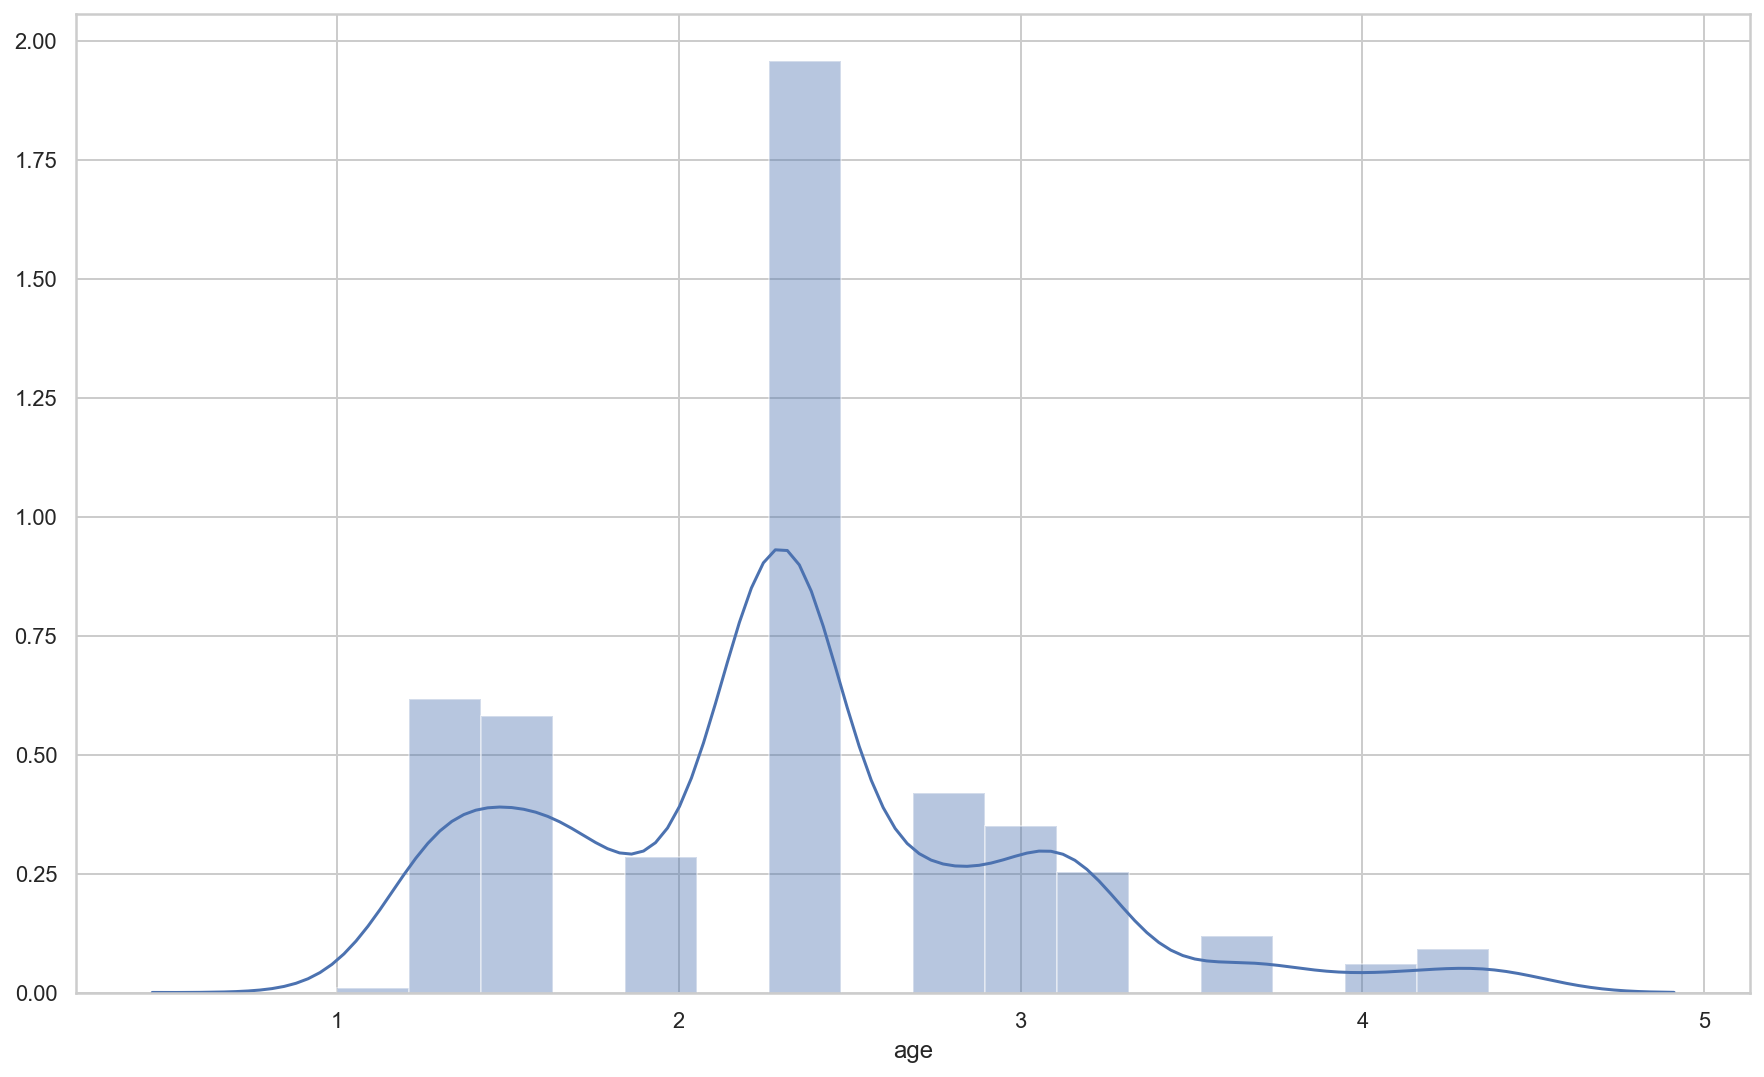

In [192]:
sns.distplot(data['age'])

*$ Compressive Strength $*

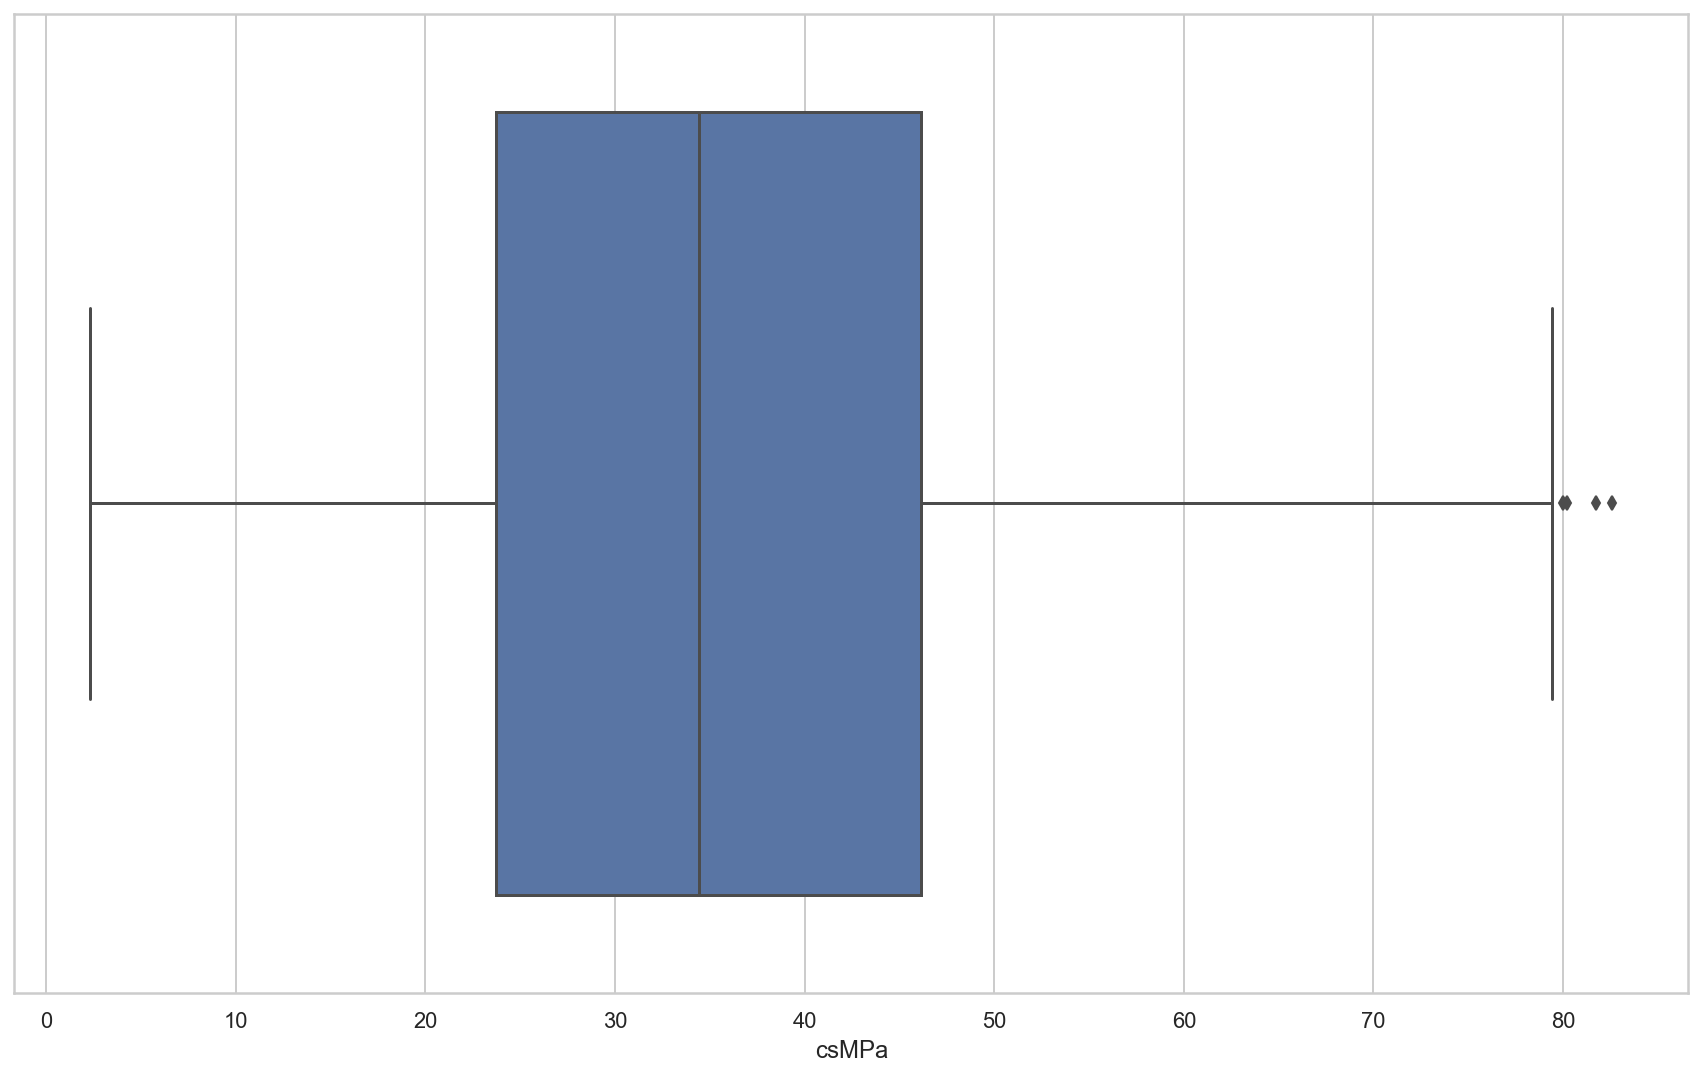

In [193]:
sns.boxplot(data['csMPa'])

*$Fine Aggregate$*

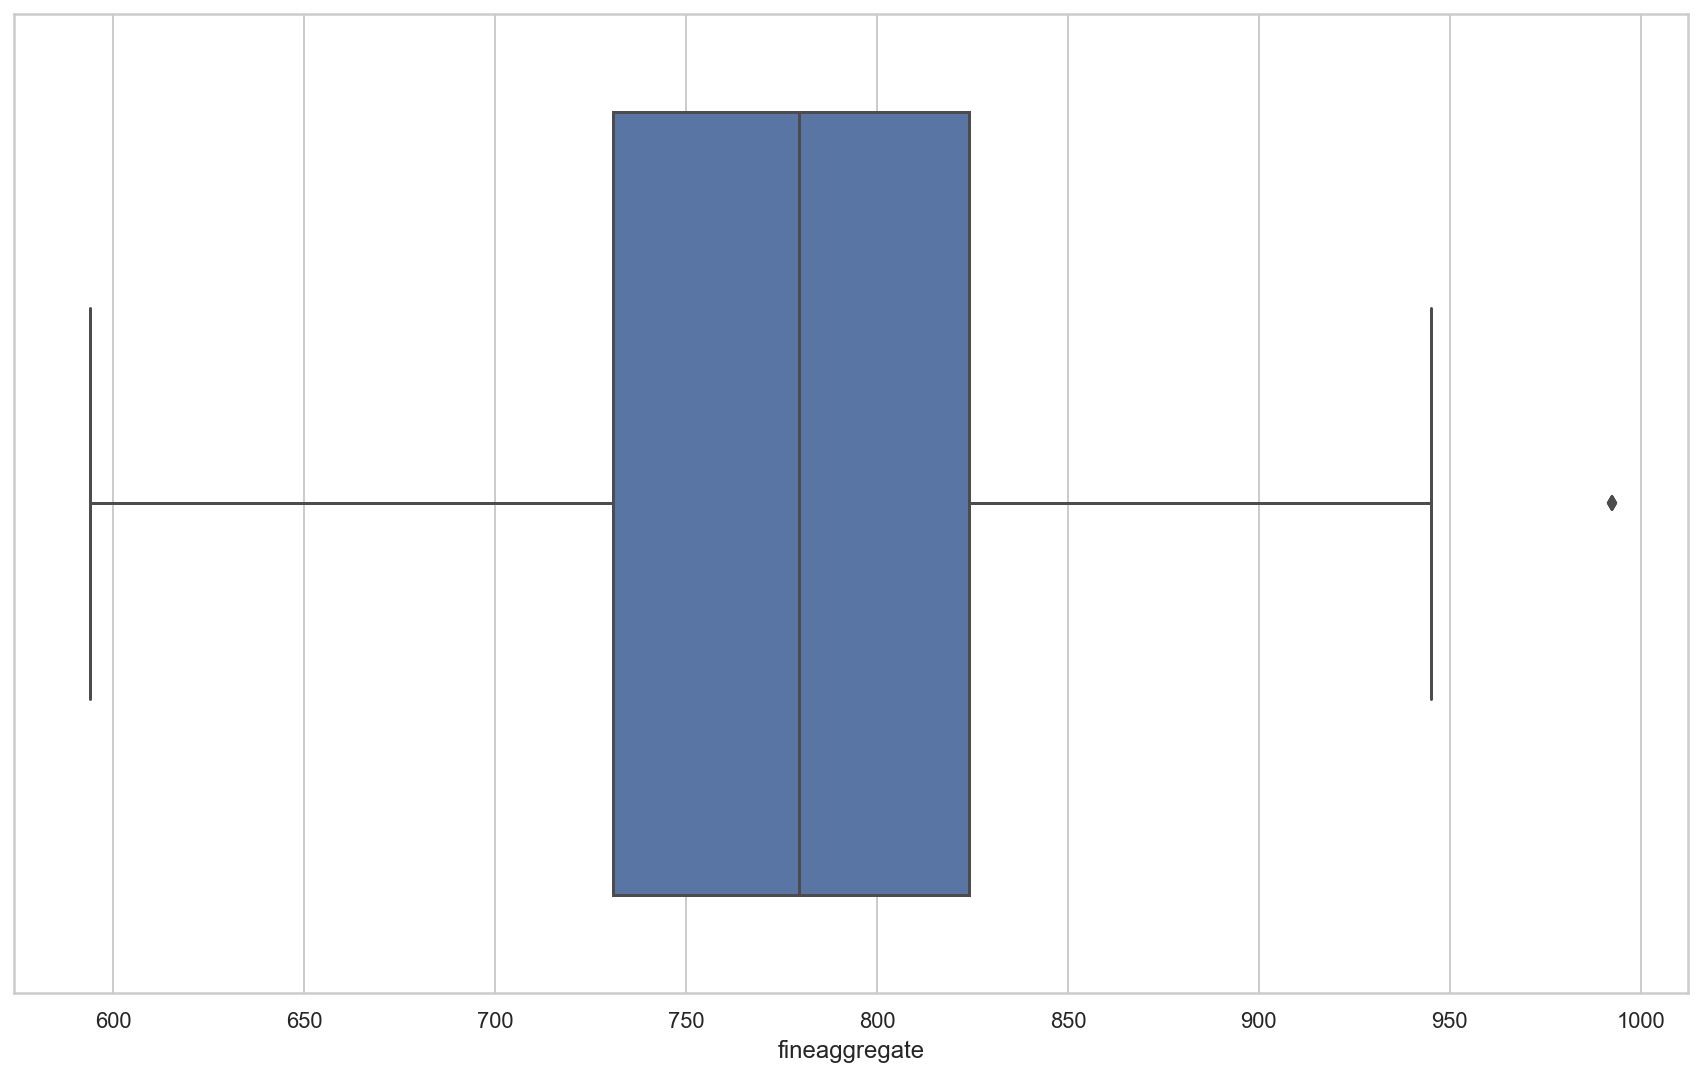

In [194]:
sns.boxplot(data['fineaggregate'])

*$Superplasticizer$*

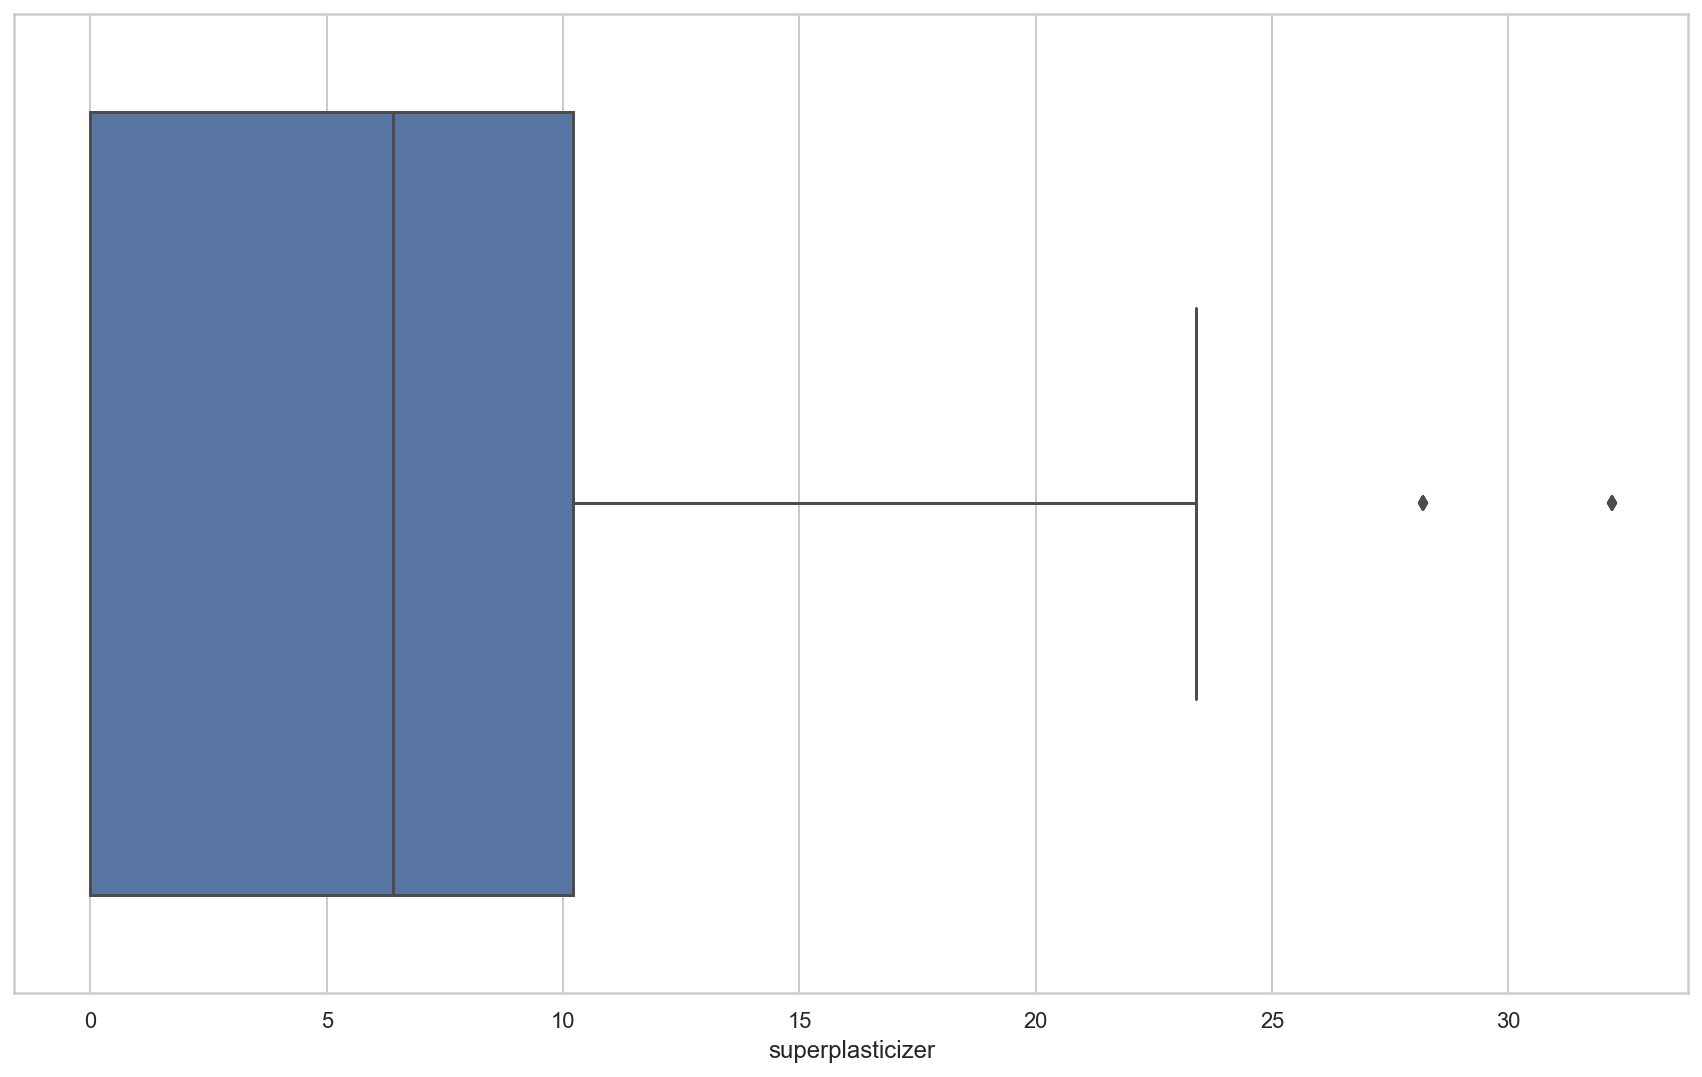

In [195]:
sns.boxplot(data['superplasticizer'])

In [196]:
data['superplasticizer'] = np.sqrt(data['superplasticizer'])

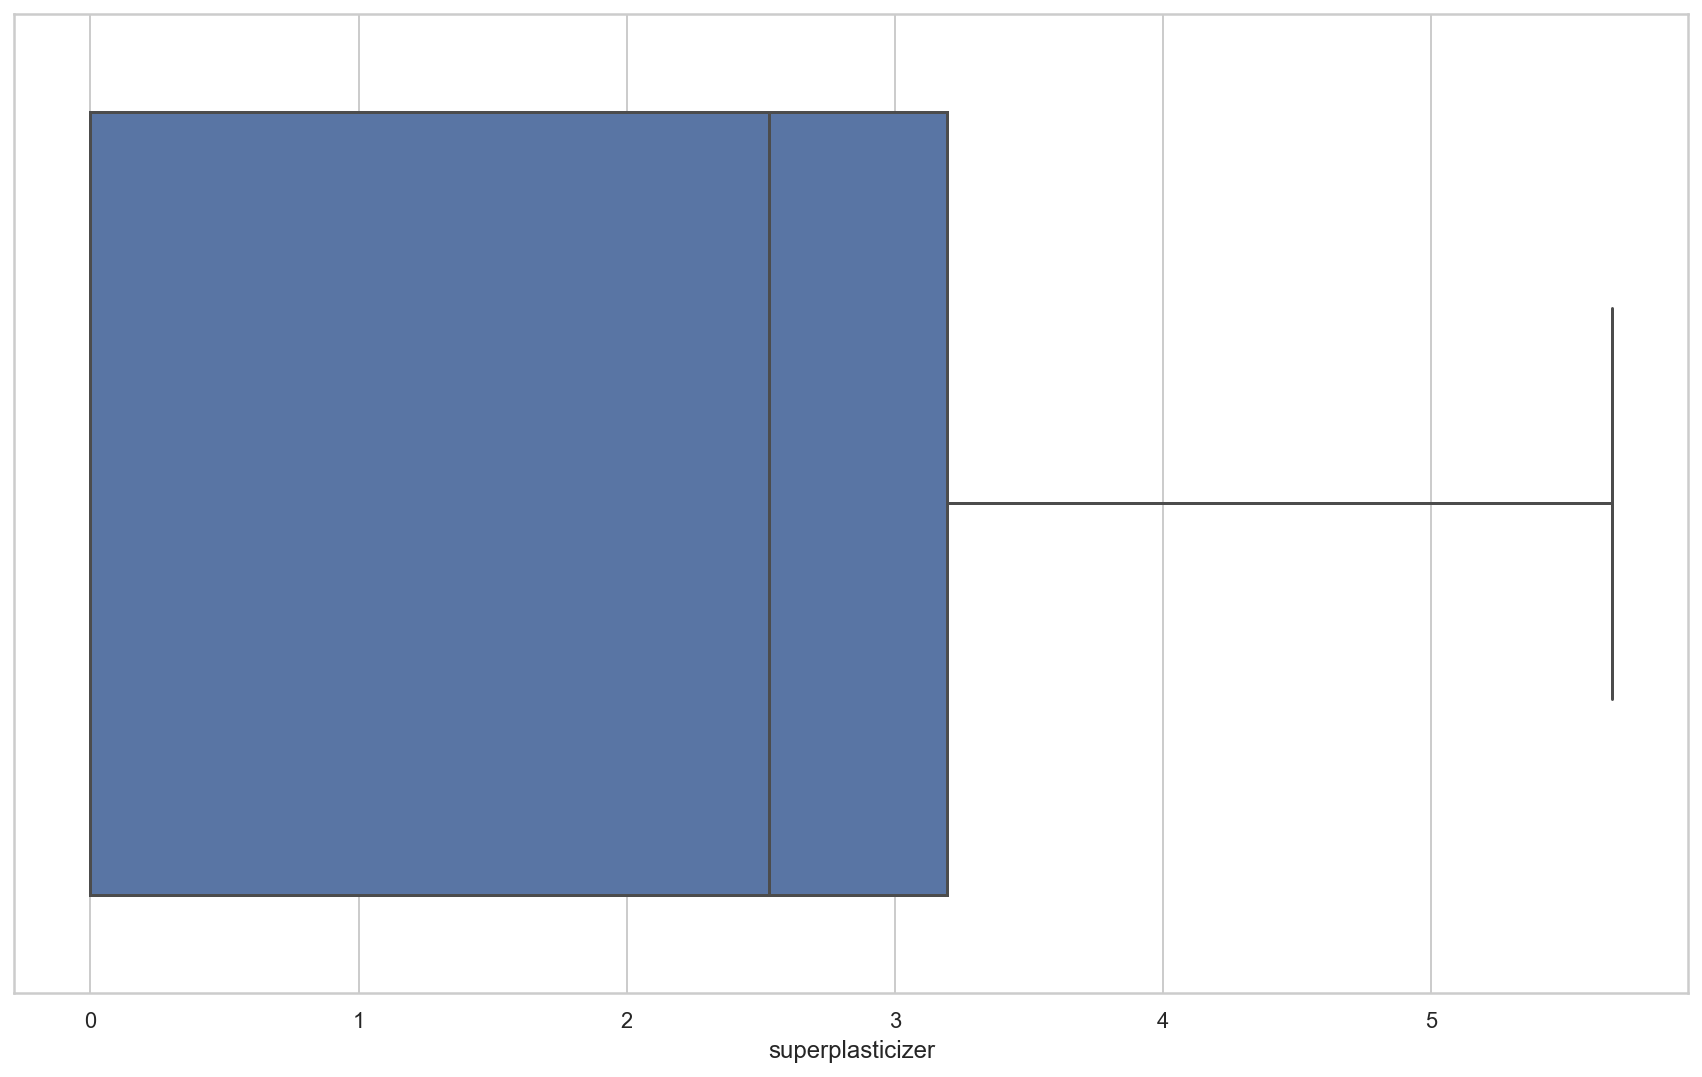

In [197]:
sns.boxplot(data['superplasticizer'])

*$Water$*

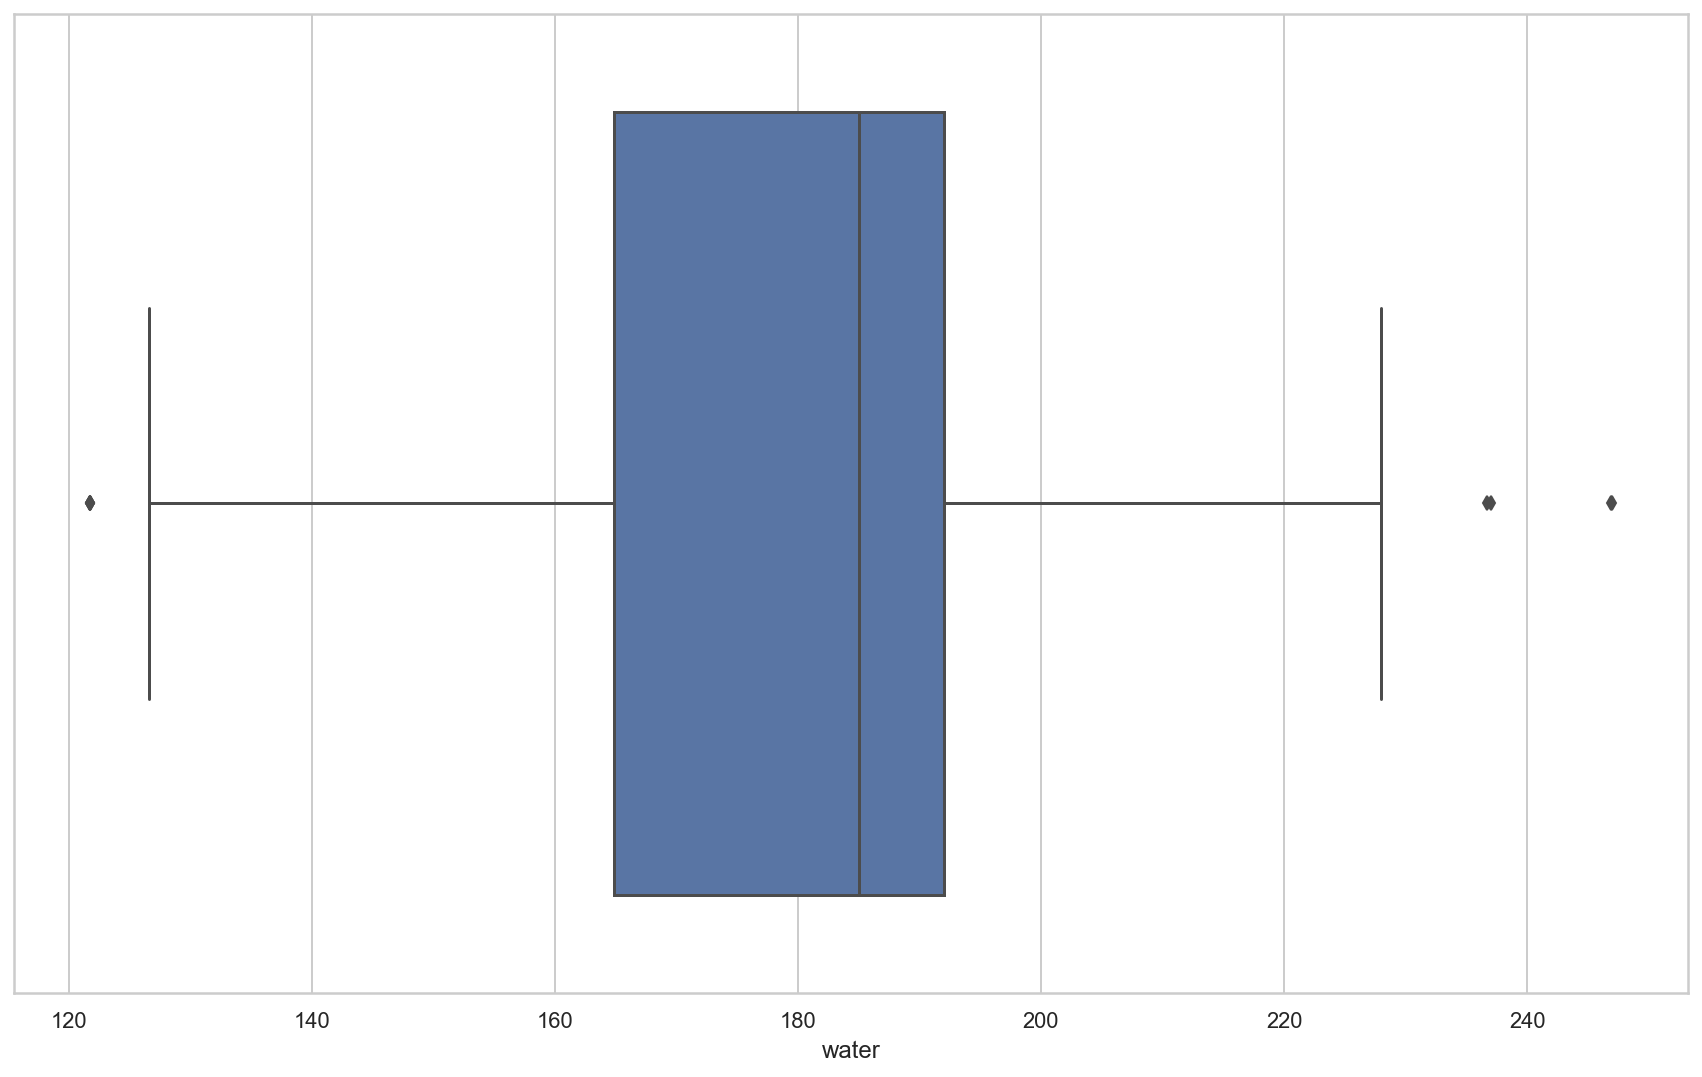

In [198]:
sns.boxplot(data['water'])

No Trasformation done on *Water*

*$Slag$*

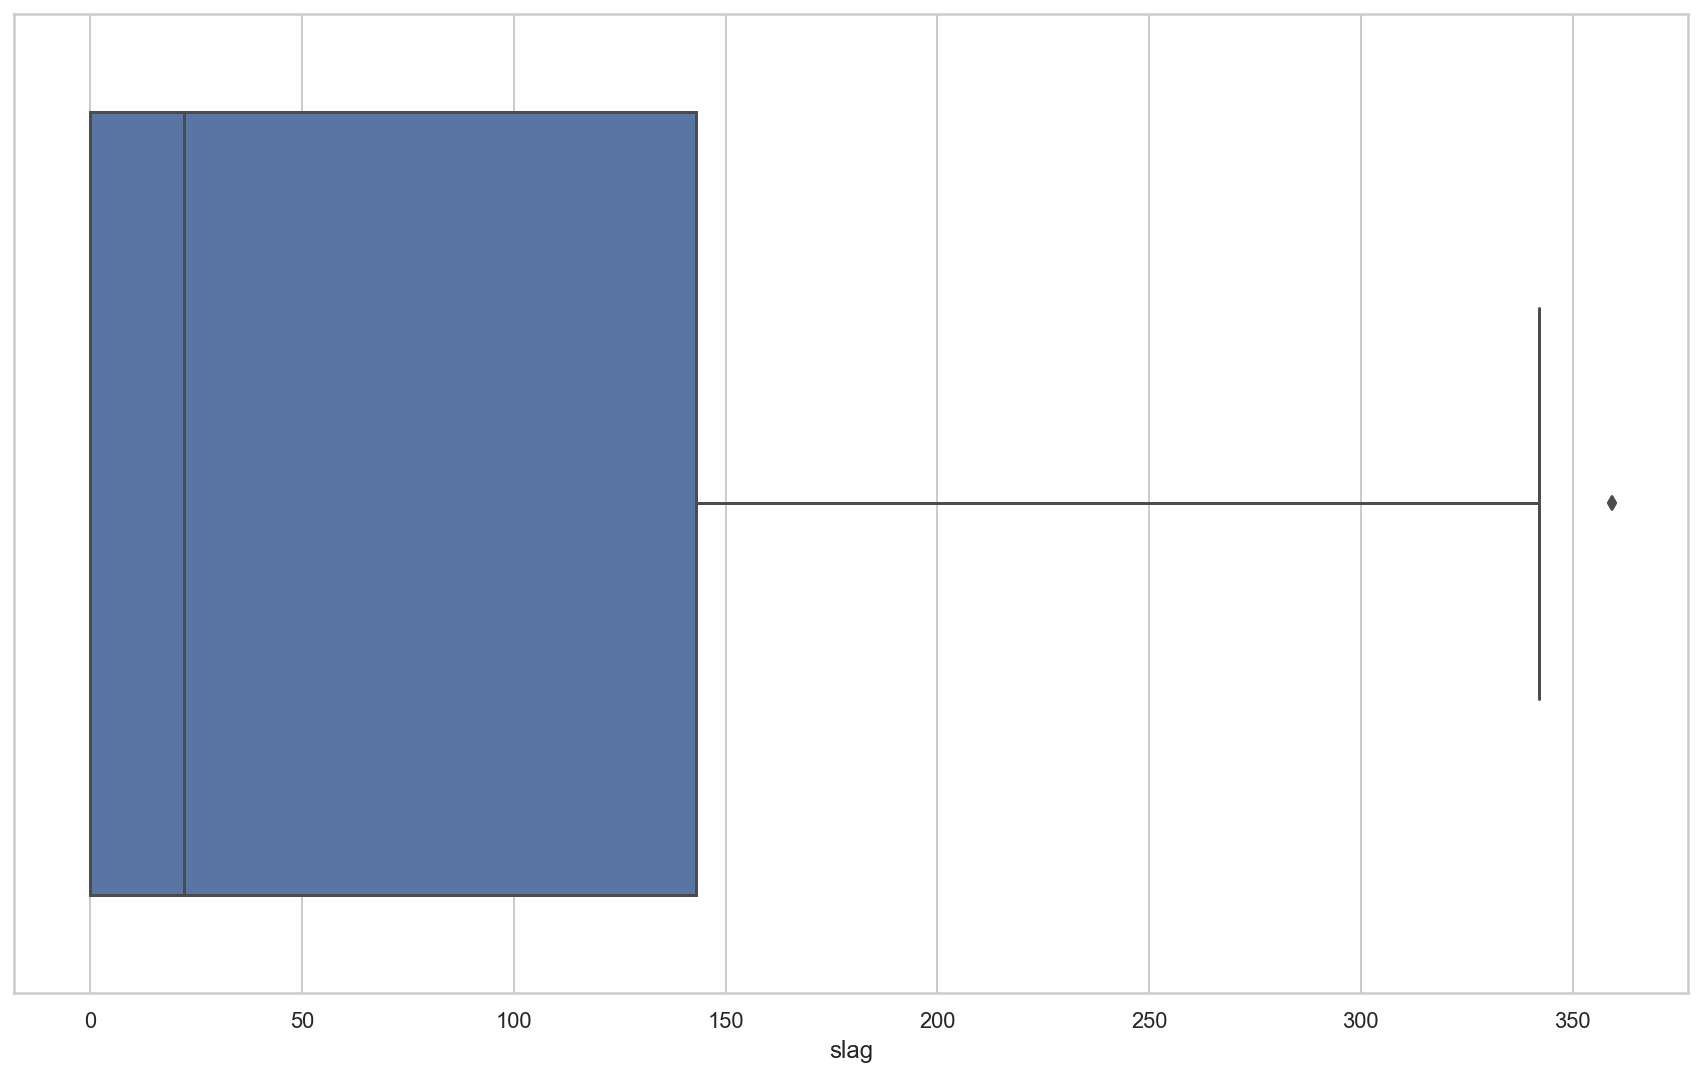

In [199]:
sns.boxplot(data['slag'])

In [200]:
data['slag'] =np.sqrt(data['slag'])

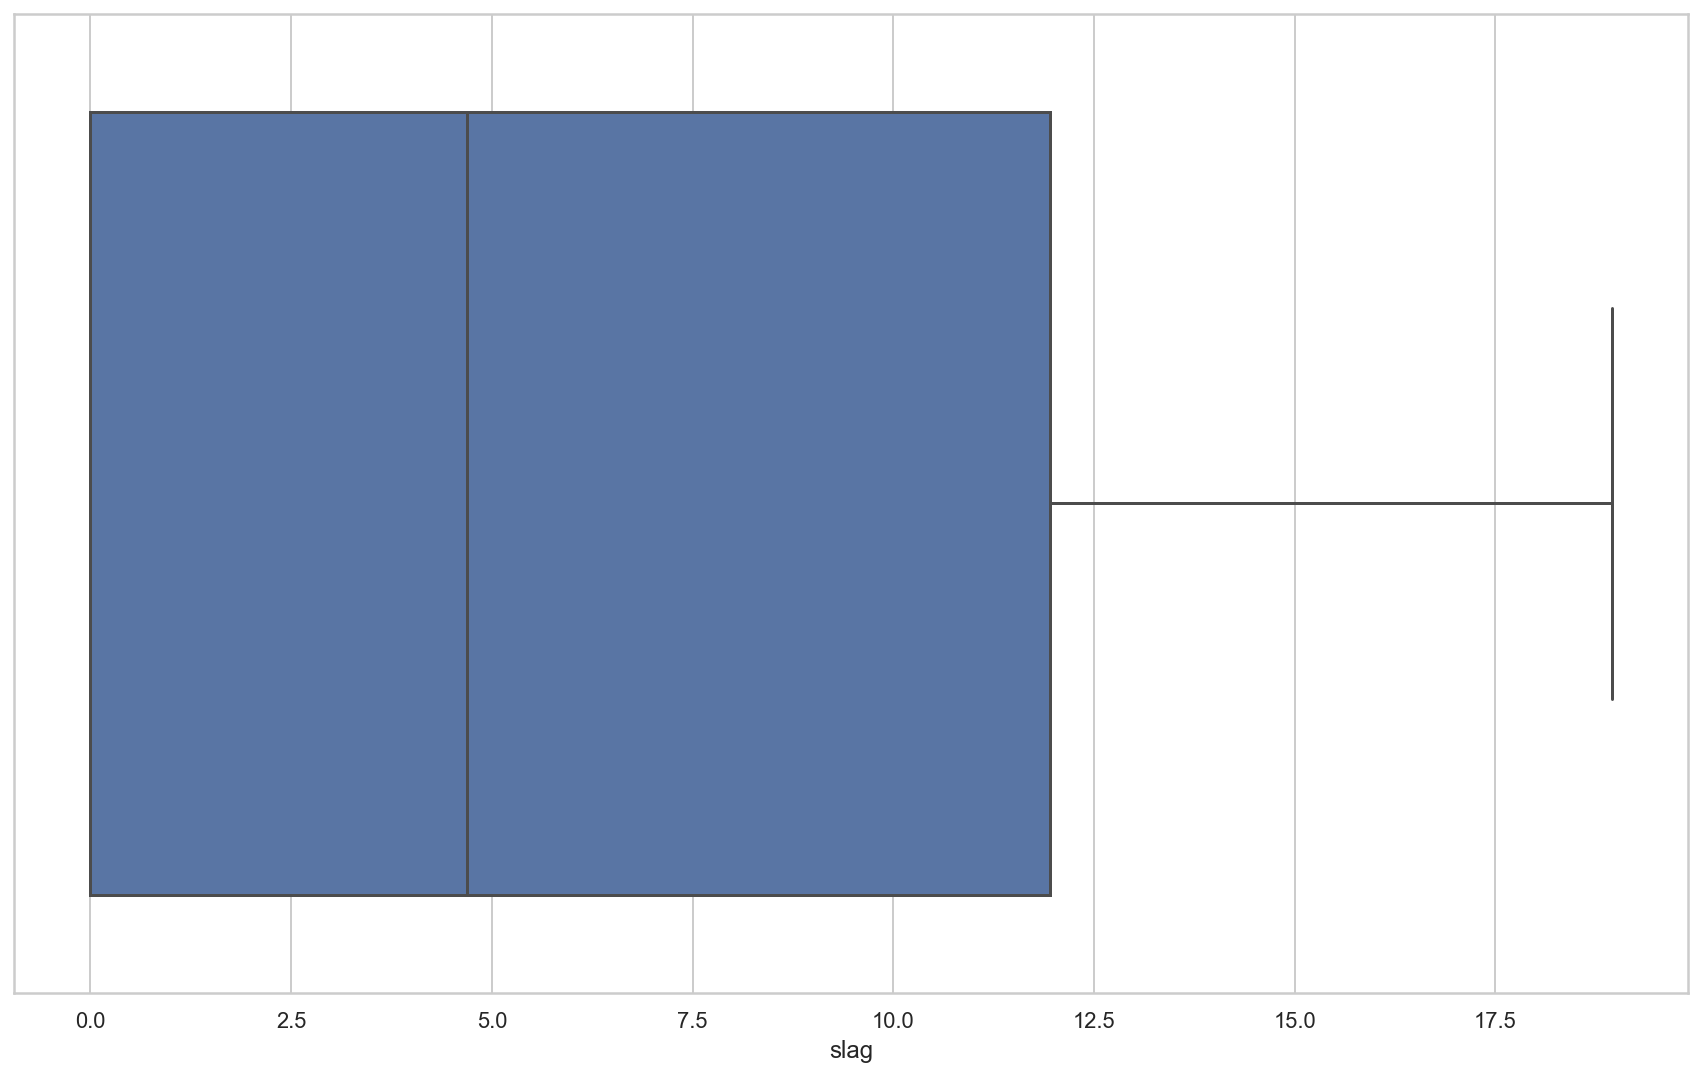

In [201]:
sns.boxplot(data['slag'])


In [202]:
data.head()

cement       slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0   0.000000     0.0  162.0          1.581139           1040.0   
1   540.0   0.000000     0.0  162.0          1.581139           1055.0   
2   332.5  11.937336     0.0  228.0          0.000000            932.0   
3   332.5  11.937336     0.0  228.0          0.000000            932.0   
4   198.6  11.506520     0.0  192.0          0.000000            978.4   

   fineaggregate       age  csMPa  
0          676.0  2.300327  79.99  
1          676.0  2.300327  61.89  
2          594.0  4.053600  40.27  
3          594.0  4.370924  41.05  
4          825.5  4.355877  44.30

### Again Checking the Accuracy on Transformed data

In [203]:
X = data.drop('csMPa', axis=1)
y = data['csMPa']

In [204]:
X_constant=sm.add_constant(X)
model =sm.OLS(y,X_constant).fit()
predictions =model.predict(X_constant)
model.summary()

C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     482.6
Date:                Wed, 01 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:22:07   Log-Likelihood:                -3555.4
No. Observations:                1030   AIC:                             7129.
Df Residuals:                    1021   BIC:                             7173.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -49.1151     17.711     -2.773      0.006     -83.869     -14.361
cement               0.1096      0.005     19.993      0.000       0.099       0.120
slag                 1.2705      0.093     13.591      0.000       1.087       1.454
flyash               0.0495      0.008      5.828      0.000       0.033       0.066
water               -0.1412      0.027     -5.219      0.000      -0.194      -0.088
superplasticizer     1.7432      0.277      6.282      0.000       1.199       2.288
coarseaggregate      0.0221      0.006      3.419      0.001       0.009       0.035
fineaggregate        0.0147      0.007      2.070      0.039       0.001       0.029
age                 14.3697      0.360     39.917      0.000      13.663      15.076
==============================================================================
Omnibus:                       14.260   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.710
Skew:                           0.073   Prob(JB):                     1.17e-05
Kurtosis:                       3.713   Cond. No.                     9.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Building a model on Transformed Data- Linear Regression

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [206]:
lr = LinearRegression()

In [207]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
y_train_pred = lr.predict(X_train)

In [209]:
y_test_pred = lr.predict(X_test)

In [210]:
print('Train Accuracy :' ,(r2_score(y_train, y_train_pred)*100))

Train Accuracy : 80.51740532490021


In [211]:
print('Test Accuracy: ', (r2_score(y_test, y_test_pred)*100))

Test Accuracy:  74.66069662467689


In [212]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 69.54682261227629
Mean Absolute Error: 6.228640886862614
Root Mean Squared Error: 8.339473761112046


Transformed Data:
    
    Train Accuracy : 80.51740532490021
    
    
    Test Accuracy:  74.66069662467689

## Checking Assumption for Parametric Models

### 1. Auto-Correlation

In [213]:
data.corr()

cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.246439 -0.397467 -0.081587         -0.005310   
slag             -0.246439  1.000000 -0.273846  0.070339          0.088960   
flyash           -0.397467 -0.273846  1.000000 -0.256984          0.524172   
water            -0.081587  0.070339 -0.256984  1.000000         -0.632292   
superplasticizer -0.005310  0.088960  0.524172 -0.632292          1.000000   
coarseaggregate  -0.109349 -0.332380 -0.009961 -0.182294         -0.245879   
fineaggregate    -0.222718 -0.264426  0.079108 -0.450661          0.204239   
age               0.025590 -0.020930 -0.055096  0.199847         -0.095684   
csMPa             0.497832  0.180805 -0.105755 -0.289633          0.348298   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.025590  0.497832  
slag                    -0.332380      -0.264426 -0.020930  0.180805  
flyash                  -0.009961       0.079108 -0.055096 -0.105755  
water                   -0.182294      -0.450661  0.199847 -0.289633  
superplasticizer        -0.245879       0.204239 -0.095684  0.348298  
coarseaggregate          1.000000      -0.178481 -0.027916 -0.164935  
fineaggregate           -0.178481       1.000000 -0.125593 -0.167241  
age                     -0.027916      -0.125593  1.000000  0.519950  
csMPa                   -0.164935      -0.167241  0.519950  1.000000

From the Pearsons Correlation lets check our dependent variable relation with independent variables.

Also, check the auto-correlation between independent variables

#Observation : *There dont seem to be any auto-correlation between independent variables*

### 2. No Hetroscadasticity

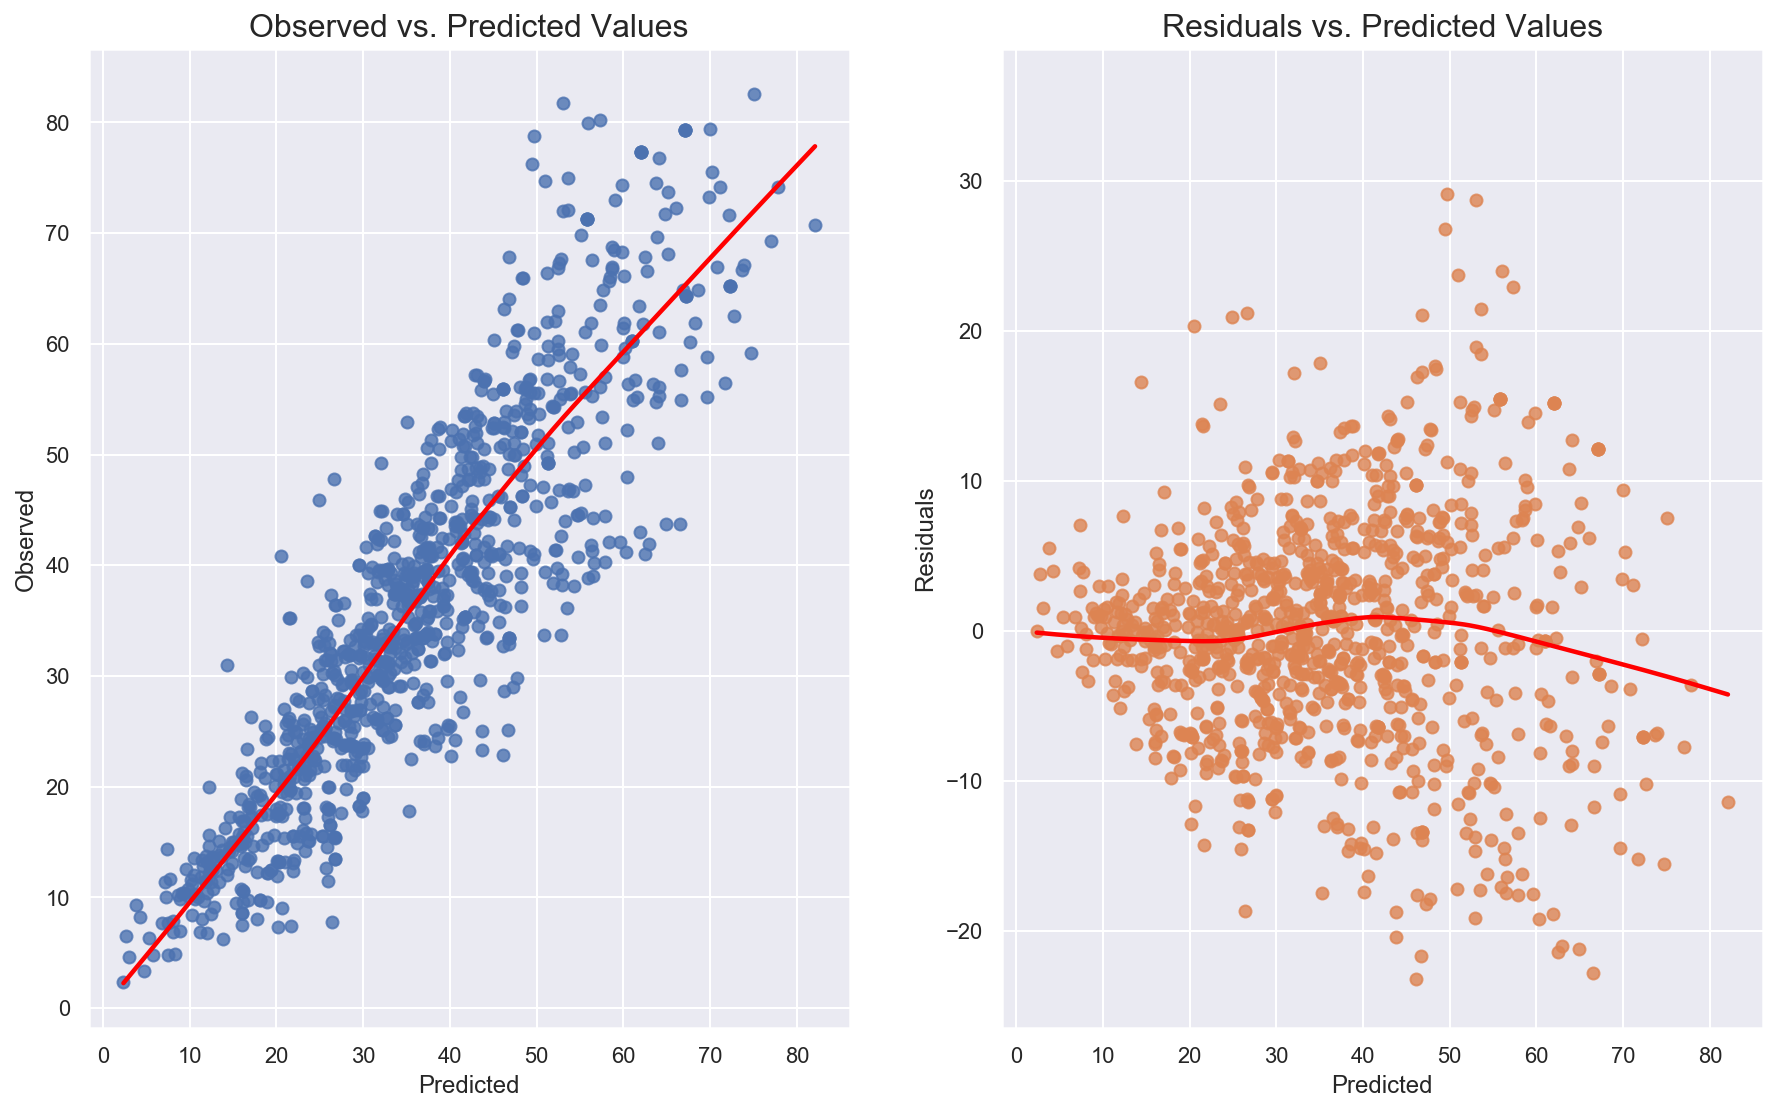

In [214]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict(X_constant)
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)    

### 3. Checking Linearity of the residuals

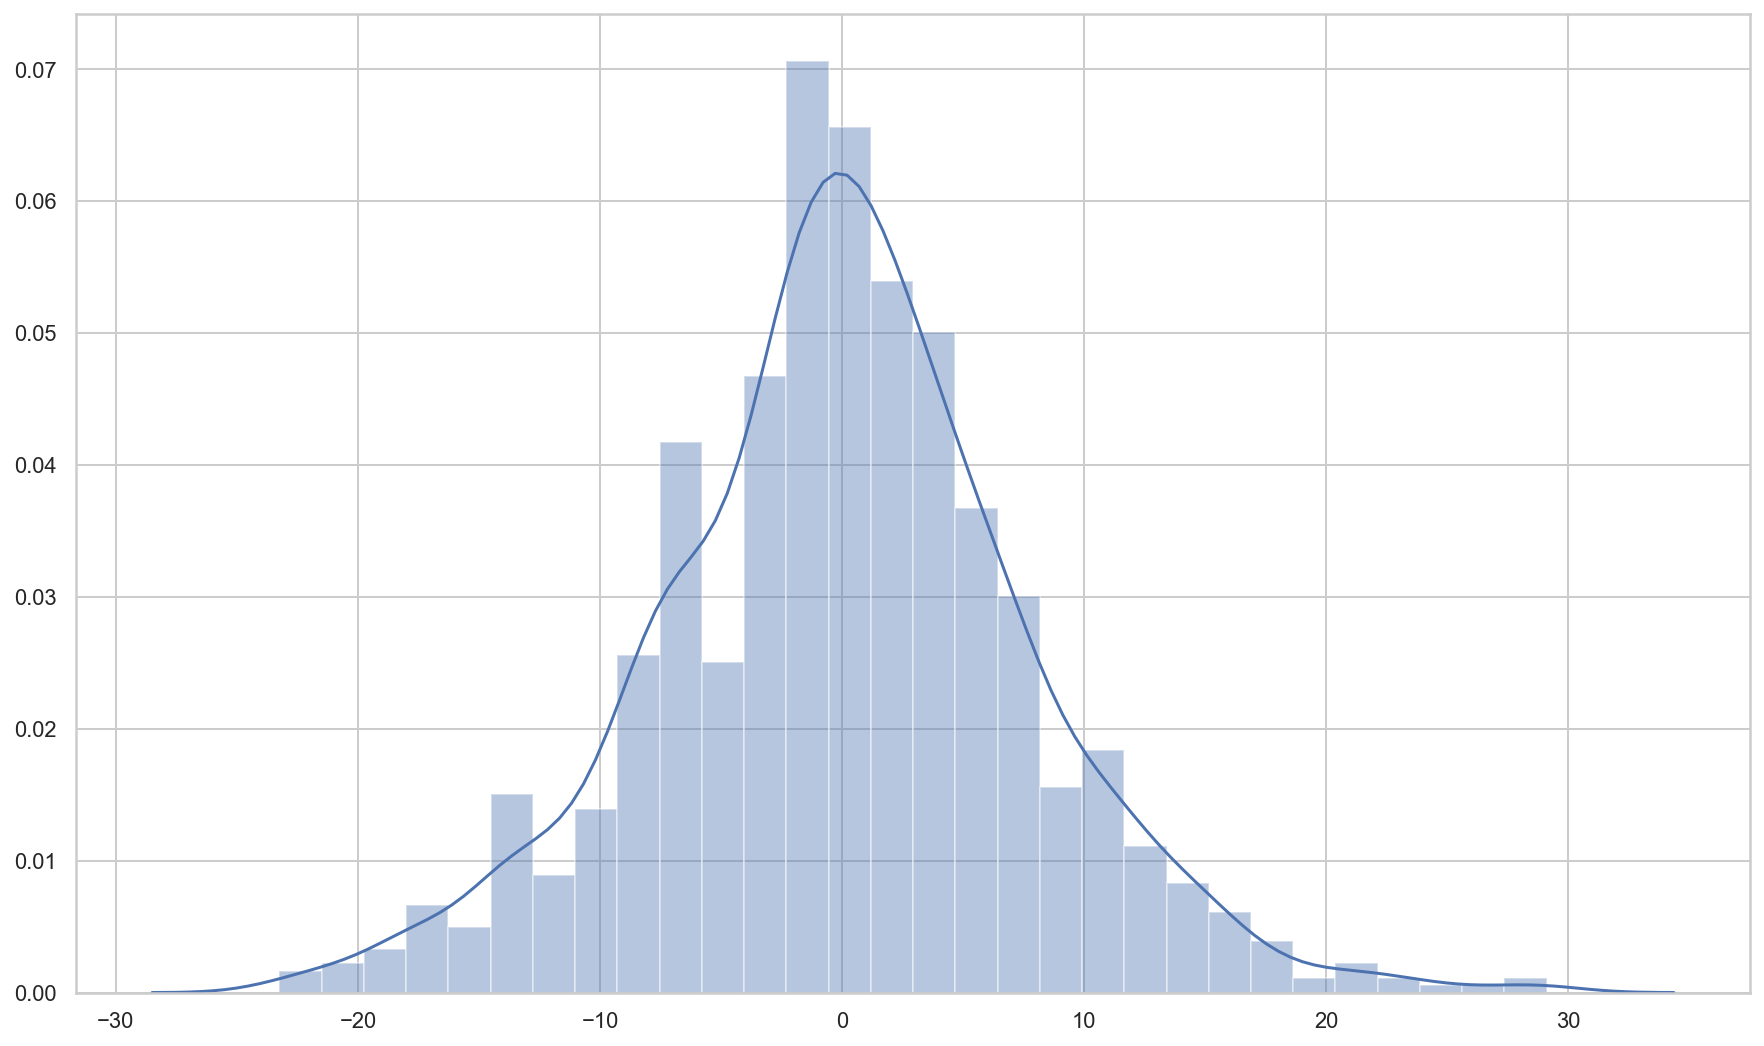

In [215]:
resids = model.resid
sns.set(style = 'whitegrid')
sns.distplot(resids)

From Above plot we can clearly see that the residuals are normally distributed along the data

## Since, The Assumptipons are satisfied we can go ahead with Model building

## Building a model on Scaled Data- Linear Regression

In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [217]:
X_sc= sc.fit_transform(X)

In [218]:
X_sc = pd.DataFrame(X_sc, columns = X.columns)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=45)

In [220]:
X_constant=sm.add_constant(X_train)
model =sm.OLS(y_train,X_constant).fit()
predictions =model.predict(X_constant)
model.summary()

C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     367.8
Date:                Wed, 01 Jan 2020   Prob (F-statistic):          5.20e-247
Time:                        17:22:13   Log-Likelihood:                -2465.6
No. Observations:                 721   AIC:                             4949.
Df Residuals:                     712   BIC:                             4990.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               36.0742      0.278    129.838      0.000      35.529      36.620
cement              10.7554      0.660     16.287      0.000       9.459      12.052
slag                 6.9585      0.668     10.421      0.000       5.647       8.269
flyash               2.9970      0.612      4.894      0.000       1.795       4.199
water               -4.0124      0.679     -5.912      0.000      -5.345      -2.680
superplasticizer     2.2787      0.500      4.558      0.000       1.297       3.260
coarseaggregate      0.6641      0.594      1.118      0.264      -0.502       1.830
fineaggregate        0.6513      0.673      0.968      0.333      -0.670       1.973
age                 10.3536      0.292     35.478      0.000       9.781      10.927
==============================================================================
Omnibus:                       11.786   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.162
Skew:                          -0.071   Prob(JB):                     6.90e-05
Kurtosis:                       3.786   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
lr = LinearRegression()

In [222]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
y_train_pred = lr.predict(X_train)

In [224]:
y_test_pred = lr.predict(X_test)

In [225]:
print('Train Accuracy :' ,(r2_score(y_train, y_train_pred)*100))

Train Accuracy : 80.51740532490021


In [226]:
print('Test Accuracy: ', (r2_score(y_test, y_test_pred)*100))

Test Accuracy:  74.66069662467687


In [227]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 69.5468226122763
Mean Absolute Error: 6.2286408868626175
Root Mean Squared Error: 8.339473761112046


Transformed Data:
    
    Train Accuracy : 80.51740532490021
    
    
    Test Accuracy:  74.66069662467689

Same accuray after Scaling the Data

## Ridge Regularization

In [228]:
ridge = Ridge(alpha =0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [229]:
pd.DataFrame(ridge.coef_, X_train.columns, columns =['coef_'])

coef_
cement            10.688042
slag               6.891525
flyash             2.940737
water             -4.053055
superplasticizer   2.286434
coarseaggregate    0.616845
fineaggregate      0.592217
age               10.342920

In [230]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('Train Accuracy : ',r2_score(y_train, y_train_pred))
print('Test Accuracy: ',r2_score(y_test, y_test_pred))

Train Accuracy :  0.8051707475046065
Test Accuracy:  0.7465009436524399


Using best parameters

In [231]:
n_alphas = 100
alphas = np.logspace(-1,1)

ridge_cv = RidgeCV(alphas , store_cv_values =True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

1.3894954943731375

In [232]:
ridge = Ridge(alpha =1.3894954943731375)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('Train Accuracy : ',r2_score(y_train, y_train_pred))
print('Test Accuracy: ',r2_score(y_test, y_test_pred))
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Train Accuracy :  0.8051497826062151
Test Accuracy:  0.7463154112856518
Mean Squared Error: 69.62684344340254
Mean Absolute Error: 6.232260849275216
Root Mean Squared Error: 8.3442700965035


## Lasso Regularization

In [233]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Train Accuracy : ',r2_score(y_train, y_train_pred))
print('Test Accuracy: ',r2_score(y_test, y_test_pred))
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Train Accuracy :  0.7771684789985744
Test Accuracy:  0.7287795679917033
Mean Squared Error: 74.43977047954431
Mean Absolute Error: 6.539860555472811
Root Mean Squared Error: 8.627848542918699


With Ridge there is not much improvement in the accuracy and with Lasso the accuracy is going further low. Therefore, both of there regularization techniques are poor in increasing accuracy of this data

## Ada Boost Regressor

In [234]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()

In [235]:
adb.fit(X_train, y_train)
y_train_pred = adb.predict(X_train)
y_test_pred = adb.predict(X_test)

print('Train Accuracy : ',r2_score(y_train, y_train_pred))
print('Test Accuracy: ',r2_score(y_test, y_test_pred))

MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Train Accuracy :  0.8309394904079094
Test Accuracy:  0.7726431718840509
Mean Squared Error: 62.40086698700758
Mean Absolute Error: 6.392730706581814
Root Mean Squared Error: 7.899421940054069


## KNN Regressor

In [236]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Train Accuracy : ',r2_score(y_train, y_train_pred))
print('Test Accuracy: ',r2_score(y_test, y_test_pred))

MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Train Accuracy :  0.8975966864694931
Test Accuracy:  0.8143070303548954
Mean Squared Error: 50.96571057605178
Mean Absolute Error: 5.22010355987055
Root Mean Squared Error: 7.139027285005414


### Creating more Features Using Polynomial preprocessing to perform feature engineering

In [237]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
Xp  = poly.fit_transform(X_sc)

In [238]:
Xp = pd.DataFrame(Xp, columns = poly.get_feature_names(X_sc.columns))

In [239]:
Xp.head()

1    cement      slag    flyash     water  superplasticizer  \
0  1.0  2.477915 -0.989207 -0.847144 -0.916764         -0.223691   
1  1.0  2.477915 -0.989207 -0.847144 -0.916764         -0.223691   
2  1.0  0.491425  0.964093 -0.847144  2.175461         -1.229851   
3  1.0  0.491425  0.964093 -0.847144  2.175461         -1.229851   
4  1.0 -0.790459  0.893598 -0.847144  0.488793         -1.229851   

   coarseaggregate  fineaggregate       age  cement^2  ...  \
0         0.863154      -1.217670 -0.006229  6.140062  ...   
1         1.056164      -1.217670 -0.006229  6.140062  ...   
2        -0.526517      -2.240917  2.568225  0.241499  ...   
3        -0.526517      -2.240917  3.034172  0.241499  ...   
4         0.070527       0.647884  3.012079  0.624825  ...   

   superplasticizer^2  superplasticizer coarseaggregate  \
0            0.050038                         -0.193080   
1            0.050038                         -0.236254   
2            1.512532                          0.647538   
3            1.512532                          0.647538   
4            1.512532                         -0.086737   

   superplasticizer fineaggregate  superplasticizer age  coarseaggregate^2  \
0                        0.272382              0.001393           0.745035   
1                        0.272382              0.001393           1.115483   
2                        2.755993             -3.158532           0.277221   
3                        2.755993             -3.731578           0.277221   
4                       -0.796800             -3.704406           0.004974   

   coarseaggregate fineaggregate  coarseaggregate age  fineaggregate^2  \
0                      -1.051037            -0.005377         1.482720   
1                      -1.286059            -0.006579         1.482720   
2                       1.179882            -1.352215         5.021709   
3                       1.179882            -1.597544         5.021709   
4                       0.045693             0.212432         0.419754   

   fineaggregate age     age^2  
0           0.007585  0.000039  
1           0.007585  0.000039  
2          -5.755178  6.595778  
3          -6.799328  9.206201  
4           1.951478  9.072617  

[5 rows x 45 columns]

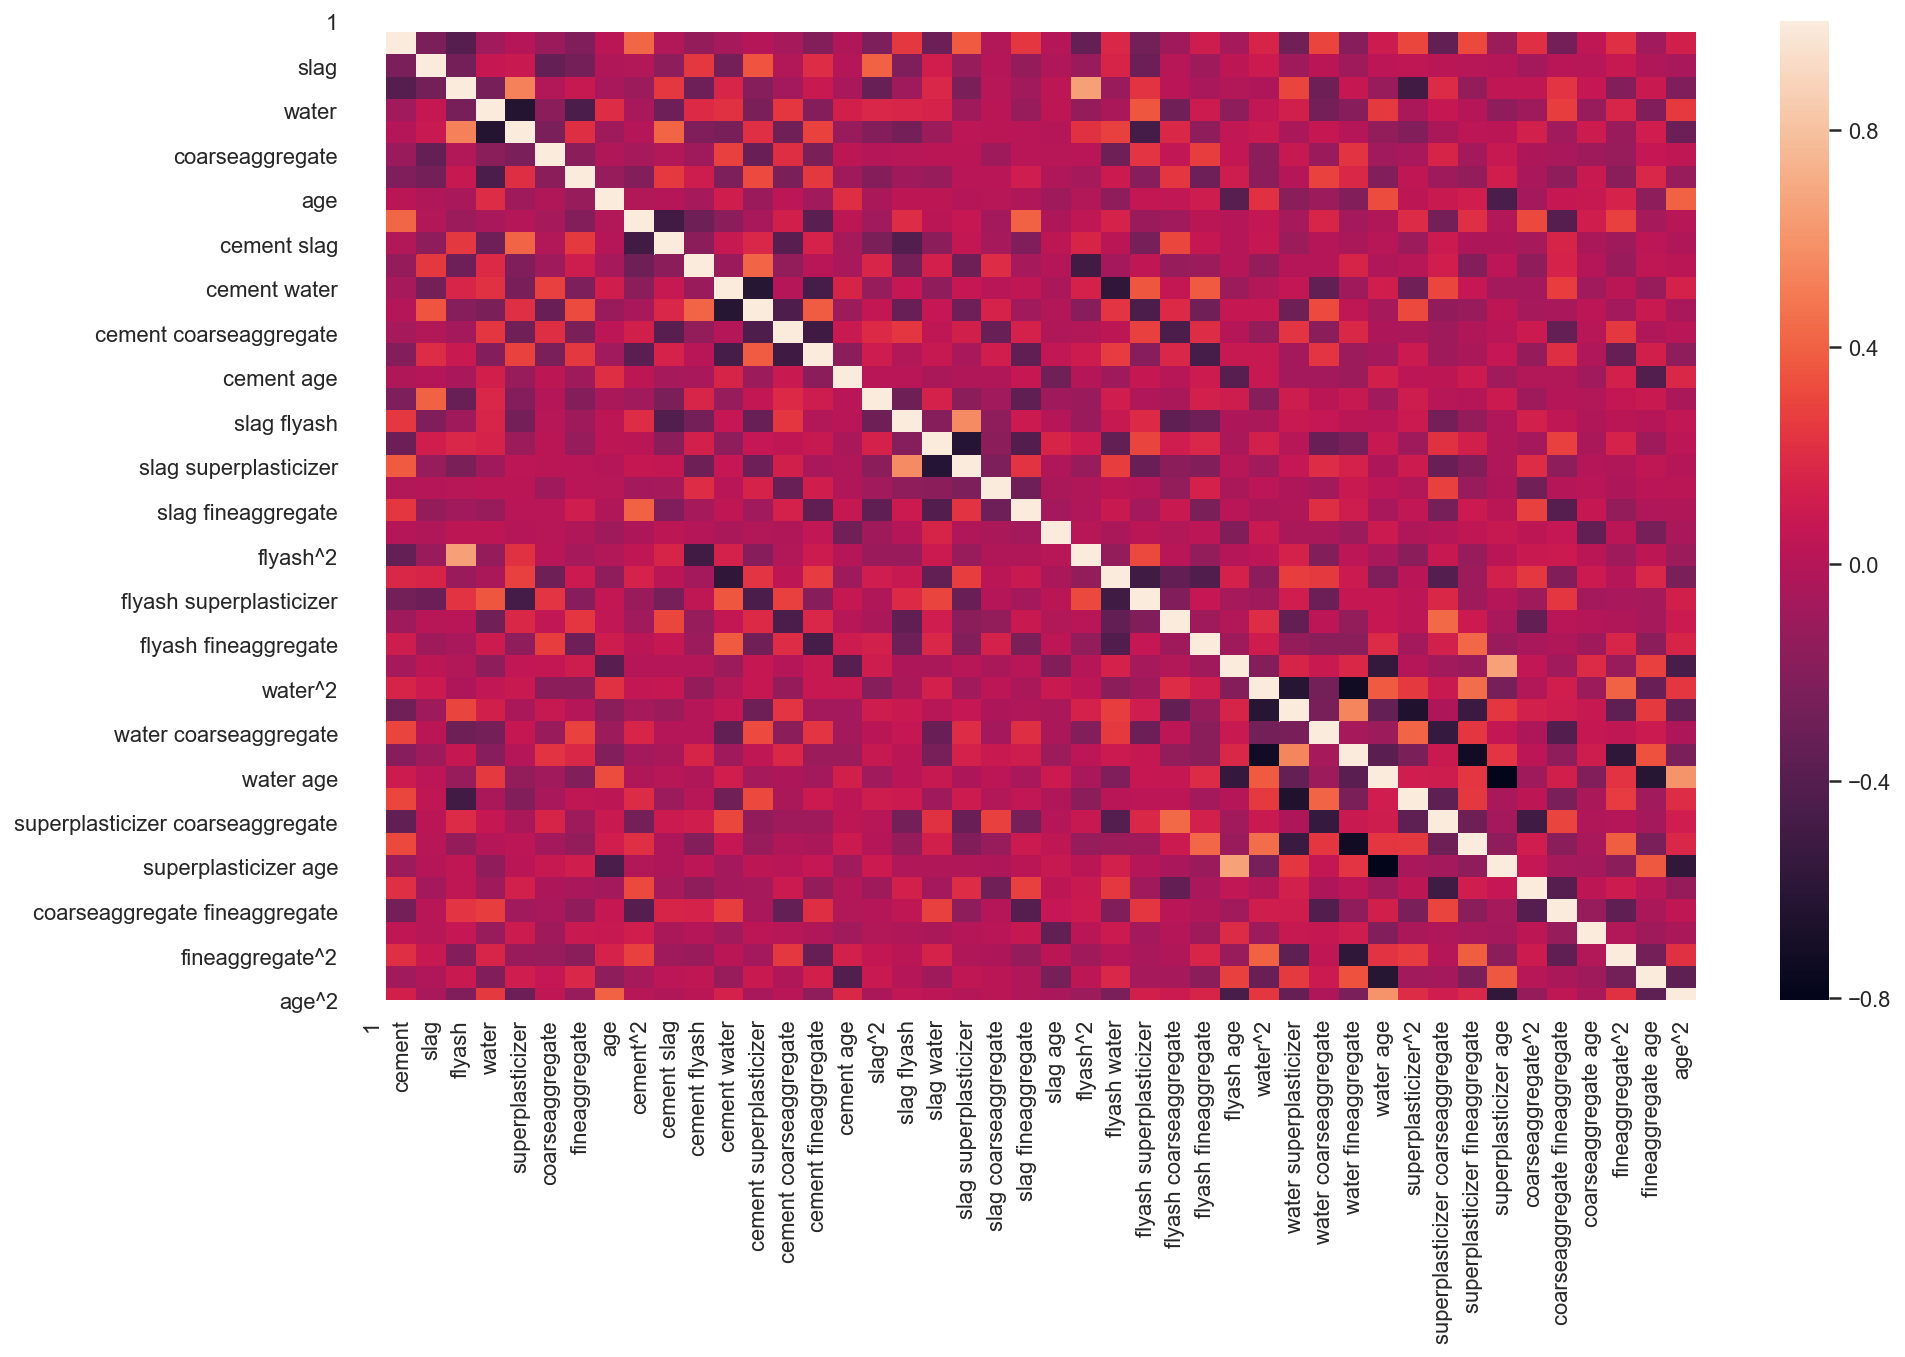

In [240]:
sns.heatmap(Xp.corr())

In [241]:
Xp.shape

(1030, 45)

In [242]:
no_of_cols = len(Xp.columns)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.30, random_state=45)

for n in range(no_of_cols):
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    
    X_test_rfe = rfe.transform(X_test)
    score= model.score(X_test_rfe, y_test)
    
    score_list.append(score)

In [243]:
score_list

[0.17942868933777512,
 0.44752328695412585,
 0.5851613279437875,
 0.6552218155083811,
 0.6744133043080747,
 0.7316732731243029,
 0.741848891139004,
 0.8073385373829116,
 0.8097334299237195,
 0.8024151999622735,
 0.8029014151207081,
 0.8052720138631223,
 0.8143806562324003,
 0.8183081115783698,
 0.8173060477447176,
 0.820641997387333,
 0.8174389979781523,
 0.8155682254706004,
 0.8146411258592432,
 0.8159127945249323,
 0.8233453236308236,
 0.8296368449325382,
 0.8234904352285619,
 0.83263046777926,
 0.8402828255721106,
 0.8399040425009074,
 0.8389898055733153,
 0.8389366566303235,
 0.8364926586219292,
 0.8368460064006585,
 0.8404970683438164,
 0.84059762711402,
 0.8462696974307171,
 0.8450171185699346,
 0.8457948580518464,
 0.8506090601616942,
 0.8527426685686037,
 0.8494156831855535,
 0.8484657828492027,
 0.8473828901578183,
 0.8474207635060049,
 0.8467965570435098,
 0.8465198552639893,
 0.8465128321783081,
 0.846512832178308]

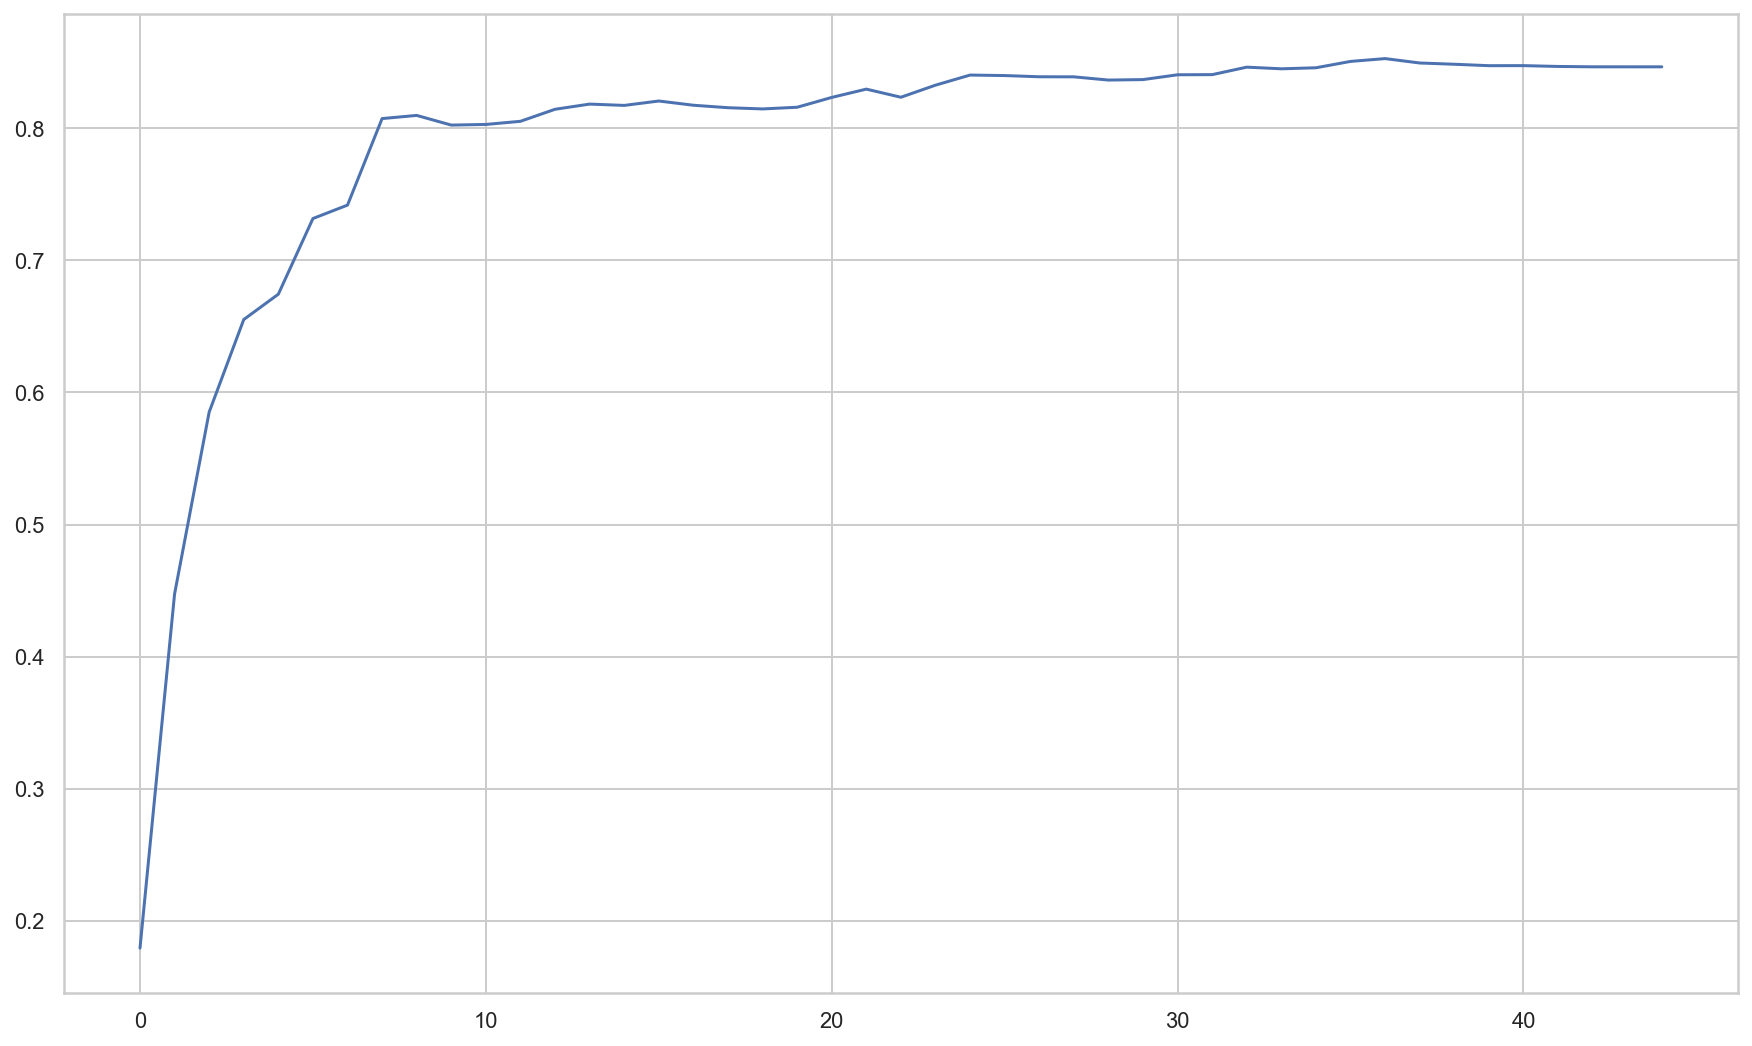

In [244]:
plt.plot(range(no_of_cols), score_list)

In [245]:
array_score_list = np.array(score_list)

In [246]:
item_index = np.where(array_score_list==np.max(score_list))
print(item_index)

(array([36], dtype=int64),)


Maximum accuracy is achieved at 36 features, but at 24 the accuracy is quite near to 36 features accuracy . Therefore with a slight increase in accuracy the model will have to accomodate 36 features and will therefore be more complex.

Henceforth, using 24 features as optimum for better model

In [247]:
model = LinearRegression()
rfe = RFE(model,24)
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

cols select
1                           cement      1
2                             slag      1
3                           flyash      1
6                  coarseaggregate      1
7                    fineaggregate      1
8                              age      1
9                         cement^2      1
10                     cement slag      1
11                   cement flyash      1
12                    cement water      1
13         cement superplasticizer      1
14          cement coarseaggregate      1
15            cement fineaggregate      1
17                          slag^2      1
25                    flyash water      1
26         flyash superplasticizer      1
31          water superplasticizer      1
32           water coarseaggregate      1
33             water fineaggregate      1
35              superplasticizer^2      1
37  superplasticizer fineaggregate      1
40   coarseaggregate fineaggregate      1
42                 fineaggregate^2      1
44                           age^2      1

In [249]:
selected_columns = sel['cols'].tolist()
selected_columns

['cement',
 'slag',
 'flyash',
 'coarseaggregate',
 'fineaggregate',
 'age',
 'cement^2',
 'cement slag',
 'cement flyash',
 'cement water',
 'cement superplasticizer',
 'cement coarseaggregate',
 'cement fineaggregate',
 'slag^2',
 'flyash water',
 'flyash superplasticizer',
 'water superplasticizer',
 'water coarseaggregate',
 'water fineaggregate',
 'superplasticizer^2',
 'superplasticizer fineaggregate',
 'coarseaggregate fineaggregate',
 'fineaggregate^2',
 'age^2']

In [250]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [251]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [252]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.8797162902136544


In [253]:
y_test_pred = lr.predict(X_test.loc[:,selected_columns])
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.8326304677792599


In [254]:
cf = pd.DataFrame([X_train.loc[:,selected_columns].columns, lr.coef_]).T
cf.columns = ['cols', 'coef_']
cf

cols     coef_
0                           cement   17.5103
1                             slag   10.7689
2                           flyash    8.5092
3                  coarseaggregate   3.38315
4                    fineaggregate   5.44048
5                              age   11.1157
6                         cement^2  -3.78422
7                      cement slag  -2.52318
8                    cement flyash  -2.07798
9                     cement water  -5.49948
10         cement superplasticizer  -2.36872
11          cement coarseaggregate  -3.09858
12            cement fineaggregate  -4.96481
13                          slag^2   6.14198
14                    flyash water  -1.95714
15         flyash superplasticizer  -1.71794
16          water superplasticizer  -2.79415
17           water coarseaggregate -0.820989
18             water fineaggregate  -2.48924
19              superplasticizer^2  -2.62772
20  superplasticizer fineaggregate  -2.24143
21   coarseaggregate fineaggregate  -1.64108
22                 fineaggregate^2  -2.23063
23                           age^2  -2.59689

In [255]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 45.93661868144016
Mean Absolute Error: 5.106881918698673
Root Mean Squared Error: 6.777655839701523


In [256]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xp[selected_columns].values, i) for i in range(Xp[selected_columns].shape[1])]
vif["features"] = Xp[selected_columns].columns

In [257]:
vif

VIF Factor                        features
0     4.463516                          cement
1     4.042989                            slag
2     3.018841                          flyash
3     2.090761                 coarseaggregate
4     3.015795                   fineaggregate
5     1.270679                             age
6    11.894732                        cement^2
7     4.470631                     cement slag
8     3.957328                   cement flyash
9     6.071100                    cement water
10    4.737396         cement superplasticizer
11    5.597308          cement coarseaggregate
12    8.650498            cement fineaggregate
13    3.832036                          slag^2
14    3.116202                    flyash water
15    5.058666         flyash superplasticizer
16    6.571143          water superplasticizer
17    1.935158           water coarseaggregate
18    9.606361             water fineaggregate
19    9.995425              superplasticizer^2
20    4.384516  superplasticizer fineaggregate
21    3.900813   coarseaggregate fineaggregate
22    7.085735                 fineaggregate^2
23    1.944083                           age^2

According to VIF values we can remove the features with VIF factor more than 6

In [258]:
Xp = Xp.drop(vif[vif['VIF Factor']>6]['features'], axis=1)

In [259]:
no_of_cols = len(Xp.columns)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.30, random_state=45)

for n in range(no_of_cols):
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    
    X_test_rfe = rfe.transform(X_test)
    score= model.score(X_test_rfe, y_test)
    
    score_list.append(score)

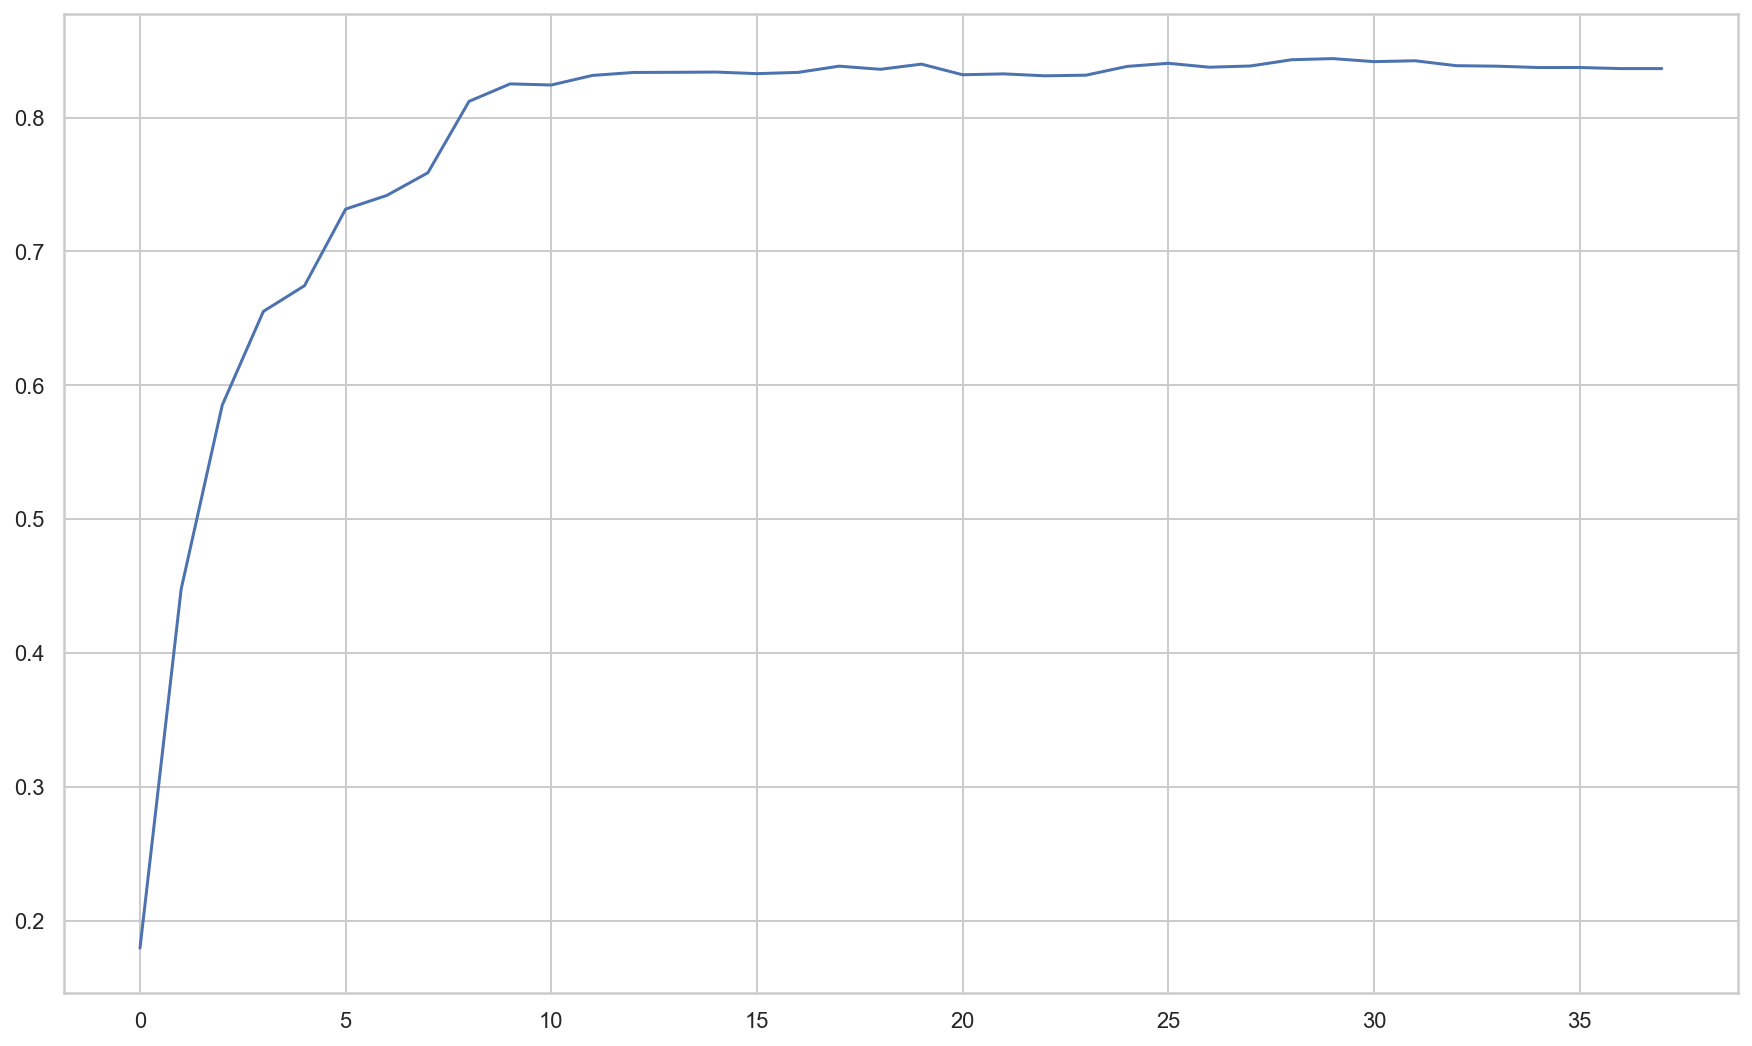

In [260]:
plt.plot(range(no_of_cols), score_list)

In [261]:
model = LinearRegression()
rfe = RFE(model,19)
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

cols select
1                             cement      1
2                               slag      1
3                             flyash      1
4                              water      1
5                   superplasticizer      1
6                    coarseaggregate      1
7                      fineaggregate      1
8                                age      1
9                        cement slag      1
14                            slag^2      1
15                       slag flyash      1
16                        slag water      1
17             slag superplasticizer      1
18              slag coarseaggregate      1
19                slag fineaggregate      1
20                          slag age      1
25              flyash fineaggregate      1
30  superplasticizer coarseaggregate      1
37                             age^2      1

In [263]:
selected_columns = sel['cols'].tolist()
selected_columns

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age',
 'cement slag',
 'slag^2',
 'slag flyash',
 'slag water',
 'slag superplasticizer',
 'slag coarseaggregate',
 'slag fineaggregate',
 'slag age',
 'flyash fineaggregate',
 'superplasticizer coarseaggregate',
 'age^2']

In [264]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [265]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [266]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.8679405144350585


In [267]:
y_test_pred = lr.predict(X_test.loc[:,selected_columns])
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.8361215383739999


In [268]:
cf = pd.DataFrame([X_train.loc[:,selected_columns].columns, lr.coef_]).T
cf.columns = ['cols', 'coef_']
cf

cols    coef_
0                             cement  14.9345
1                               slag  9.74199
2                             flyash  6.16557
3                              water -1.28024
4                   superplasticizer  1.66571
5                    coarseaggregate  2.56006
6                      fineaggregate  4.40266
7                                age  11.4851
8                        cement slag  2.61098
9                             slag^2  7.06051
10                       slag flyash  2.30785
11                        slag water  3.11458
12             slag superplasticizer  1.43525
13              slag coarseaggregate  1.65343
14                slag fineaggregate  3.66208
15                          slag age  1.35903
16              flyash fineaggregate  1.43034
17  superplasticizer coarseaggregate  2.14309
18                             age^2 -2.40819

In [269]:
MSE=mean_squared_error(y_test_pred,y_test)
print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',mean_absolute_error(y_test_pred,y_test))
print('Root Mean Squared Error:',np.sqrt(MSE))

Mean Squared Error: 44.978451585119075
Mean Absolute Error: 5.187992990774559
Root Mean Squared Error: 6.70659761616269


In [270]:
model_names = ['Base', 'After Tranforming', 'After Scaling', 'Ridge', 'Lasso', 'AdaBoost Regressor','KNN Regressor','RFE on Polynomial','VIF on Polynomial']
train_r2 = [62.414, 80.517,80.517, 80.517, 77.71, 82.42,89.75,87.97,86.79]
test_r2 = [58.09,74.66,74.66,74.63,72.68,76.31,81.4,83.26,83.61]
RMSE = [10.72,8.33,8.33,8.34,8.62,8.06,7.13,6.77,6.70]

pd.DataFrame({'Models': model_names, 'Train R2': train_r2, 'Test R2': test_r2})

Models  Train R2  Test R2
0                Base    62.414    58.09
1   After Tranforming    80.517    74.66
2       After Scaling    80.517    74.66
3               Ridge    80.517    74.63
4               Lasso    77.710    72.68
5  AdaBoost Regressor    82.420    76.31
6       KNN Regressor    89.750    81.40
7   RFE on Polynomial    87.970    83.26
8   VIF on Polynomial    86.790    83.61